In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor as RFReg
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import matplotlib.lines as mlines

from typing import (Any, Callable, Dict, Generic, Iterable, List, Mapping,
                    NewType, Sequence, Tuple, TypeVar, Union)

import os, sys

import datetime
import math

import fiona  # type: ignore
from fiona.crs import from_epsg # type: ignore
import geopandas as gpd  # type: ignore

import seaborn as sns  # type: ignore

import verde as vd

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (9, 7)
plt.rcParams['font.family'] = 'sans-serif'

In [3]:
# soils_joined_soc_ak.shp
# soils_joined_soc = 'soc_rf/soils_joined_soc_ak.shp'
soils_joined_drain = 'soc_rf/soil_drainge_merged_ml.shp' 

data = gpd.read_file(soils_joined_drain, encoding='utf-8')

display(data.head(2))
display(data.sample(5))
display(data.tail(2))

display(data.columns.values)
display(data.dtypes)

,orig_fid,upd_siffer,WRB_code,Boniteet,Varv,Loimis1,loimis_rec,nlayers,SOL_ZMX,SOL_Z1,...,tri_mean,tri_median,tri_stdev,SOC_mean,SOC_median,SOC_stddev,area_m2,area_m2_su,drain_prct,geometry
0,15159,ArG,FL-gl.wso,25,15,k?3ls1,k?3ls1,1,1000,1000,...,1.392533e+23,1.575201e+23,6.919626e+23,11.078491,11.078491,0.0,89012,0.0,0.0,"POLYGON ((442650.8100000024 6495221.460000001,..."
1,45116,Dg,UM-gln-del.nv,43,19,sl,sl,1,1000,1000,...,3.376664e+00,3.284537e+00,3.719893e-01,5.339205,5.339205,0.0,1949,0.0,0.0,"POLYGON ((593740.8299999982 6457498.41, 593746..."


,orig_fid,upd_siffer,WRB_code,Boniteet,Varv,Loimis1,loimis_rec,nlayers,SOL_ZMX,SOL_Z1,...,tri_mean,tri_median,tri_stdev,SOC_mean,SOC_median,SOC_stddev,area_m2,area_m2_su,drain_prct,geometry
244,439389,LI,PZ-et,0,5,l200,l200,1,2000,2000,...,3.815793e+00,3.803501,1.180989e+00,3.110947,3.110947,0.000000,162427,0.0,0.00000,"POLYGON ((663243.2599999979 6426628.530000001,..."
291,465033,LkG,GL-dy,28,9,l130,l130,1,1300,1300,...,4.512577e-01,0.400490,2.464972e-01,21.534300,21.534300,0.000000,272466,271255.0,99.55550,"POLYGON ((547895.9699999988 6445967.07, 547899..."
372,726744,R''',HS-fi.dy,0,11,t1150,t1150,1,1500,1500,...,3.845340e-01,0.283094,3.120101e-01,30.162413,30.742459,0.820309,2068109,106622.0,5.15553,"POLYGON ((595289.0799999982 6540639.489999998,..."
10,95961,Gh'',LP-ca-gl,20,13,ls10-20/p,ls10-20/p,2,1000,150,...,7.163186e-01,0.635760,2.628955e-01,5.671871,5.526416,0.836592,58851,0.0,0.00000,"POLYGON ((444457.049999997 6525792.239999998, ..."
81,240688,K,RG-ca,47,2,"ls1;sl20/r2,3ls130/p;r3ls1",ls1,1,1000,1000,...,1.017311e+23,0.439913,1.018443e+23,4.670097,4.934095,0.968180,753921,0.0,0.00000,"POLYGON ((454233.2299999967 6480568.09, 454232..."


,orig_fid,upd_siffer,WRB_code,Boniteet,Varv,Loimis1,loimis_rec,nlayers,SOL_ZMX,SOL_Z1,...,tri_mean,tri_median,tri_stdev,SOC_mean,SOC_median,SOC_stddev,area_m2,area_m2_su,drain_prct,geometry
395,745510,TxR,HS-fi-qt,0,20,t1150,t1150,1,1500,1500,...,0.294145,0.224918,0.224128,31.071152,31.206497,0.928477,427450,0.0,0.00000,"POLYGON ((513929.4900000021 6497718.32, 513934..."
396,745548,TxR,HS-fi-qt,0,20,t180-100/t3,t180-100/t3,2,1000,900,...,0.471160,0.397709,0.264782,32.134571,31.960557,0.931692,330497,3858.0,1.16733,"POLYGON ((646534.0600000024 6519593.780000001,..."


array(['orig_fid', 'upd_siffer', 'WRB_code', 'Boniteet', 'Varv',
       'Loimis1', 'loimis_rec', 'nlayers', 'SOL_ZMX', 'SOL_Z1', 'SOL_Z2',
       'SOL_Z3', 'SOL_Z4', 'EST_TXT1', 'LXTYPE1', 'EST_TXT2', 'LXTYPE2',
       'EST_TXT3', 'LXTYPE3', 'EST_TXT4', 'LXTYPE4', 'SOL_CLAY1',
       'SOL_SILT1', 'SOL_SAND1', 'SOL_ROCK1', 'SOL_CLAY2', 'SOL_SILT2',
       'SOL_SAND2', 'SOL_ROCK2', 'SOL_CLAY3', 'SOL_SILT3', 'SOL_SAND3',
       'SOL_ROCK3', 'SOL_CLAY4', 'SOL_SILT4', 'SOL_SAND4', 'SOL_ROCK4',
       'orig_fid2', '_mean', '_median', '_stdev', 'twi_mean',
       'twi_median', 'twi_stdev', 'ls_mean', 'ls_median', 'ls_stdev',
       'tri_mean', 'tri_median', 'tri_stdev', 'SOC_mean', 'SOC_median',
       'SOC_stddev', 'area_m2', 'area_m2_su', 'drain_prct', 'geometry'],
      dtype=object)

orig_fid        int64
upd_siffer     object
WRB_code       object
Boniteet        int64
Varv            int64
Loimis1        object
loimis_rec     object
nlayers         int64
SOL_ZMX         int64
SOL_Z1          int64
SOL_Z2          int64
SOL_Z3          int64
SOL_Z4          int64
EST_TXT1       object
LXTYPE1        object
EST_TXT2       object
LXTYPE2        object
EST_TXT3       object
LXTYPE3        object
EST_TXT4       object
LXTYPE4        object
SOL_CLAY1       int64
SOL_SILT1       int64
SOL_SAND1       int64
SOL_ROCK1       int64
SOL_CLAY2       int64
SOL_SILT2       int64
SOL_SAND2       int64
SOL_ROCK2       int64
SOL_CLAY3       int64
SOL_SILT3       int64
SOL_SAND3       int64
SOL_ROCK3       int64
SOL_CLAY4       int64
SOL_SILT4       int64
SOL_SAND4       int64
SOL_ROCK4       int64
orig_fid2       int64
_mean         float64
_median       float64
_stdev        float64
twi_mean      float64
twi_median    float64
twi_stdev     float64
ls_mean       float64
ls_median 

In [4]:
ml_cols = ['upd_siffer', 'EST_TXT1', 'SOL_CLAY1', 'SOL_SILT1', 'SOL_SAND1', 'SOL_ROCK1', '_mean', '_median', '_stdev', 'twi_mean',
       'twi_median', 'twi_stdev', 'ls_mean', 'ls_median', 'ls_stdev',
       'tri_mean', 'tri_median', 'tri_stdev', 'SOC_mean', 'SOC_median',
       'SOC_stddev']

ml_cols_w_dr = ['upd_siffer', 'EST_TXT1', 'SOL_CLAY1', 'SOL_SILT1', 'SOL_SAND1', 'SOL_ROCK1', '_mean', '_median', '_stdev', 'twi_mean',
       'twi_median', 'twi_stdev', 'ls_mean', 'ls_median', 'ls_stdev',
       'tri_mean', 'tri_median', 'tri_stdev', 'drain_prct', 'SOC_mean', 'SOC_median',
       'SOC_stddev']

ml_cols_sif = ['upd_siffer', 'SOL_CLAY1', 'SOL_SILT1', 'SOL_SAND1', 'SOL_ROCK1', '_mean', '_median', '_stdev', 'twi_mean',
       'twi_median', 'twi_stdev', 'ls_mean', 'ls_median', 'ls_stdev',
       'tri_mean', 'tri_median', 'tri_stdev', 'SOC_mean', 'SOC_median',
       'SOC_stddev']

ml_cols_sif_w_dr = ['upd_siffer', 'SOL_CLAY1', 'SOL_SILT1', 'SOL_SAND1', 'SOL_ROCK1', '_mean', '_median', '_stdev', 'twi_mean',
       'twi_median', 'twi_stdev', 'ls_mean', 'ls_median', 'ls_stdev',
       'tri_mean', 'tri_median', 'tri_stdev', 'drain_prct', 'SOC_mean', 'SOC_median',
       'SOC_stddev']

ml_cols_txt = ['EST_TXT1', 'SOL_CLAY1', 'SOL_SILT1', 'SOL_SAND1', 'SOL_ROCK1', '_mean', '_median', '_stdev', 'twi_mean',
       'twi_median', 'twi_stdev', 'ls_mean', 'ls_median', 'ls_stdev',
       'tri_mean', 'tri_median', 'tri_stdev', 'SOC_mean', 'SOC_median',
       'SOC_stddev']

ml_cols_txt_w_dr = ['EST_TXT1', 'SOL_CLAY1', 'SOL_SILT1', 'SOL_SAND1', 'SOL_ROCK1', '_mean', '_median', '_stdev', 'twi_mean',
       'twi_median', 'twi_stdev', 'ls_mean', 'ls_median', 'ls_stdev',
       'tri_mean', 'tri_median', 'tri_stdev', 'drain_prct', 'SOC_mean', 'SOC_median',
       'SOC_stddev']

ml_cols_nolab = ['SOL_CLAY1', 'SOL_SILT1', 'SOL_SAND1', 'SOL_ROCK1', '_mean', '_median', '_stdev', 'twi_mean',
       'twi_median', 'twi_stdev', 'ls_mean', 'ls_median', 'ls_stdev',
       'tri_mean', 'tri_median', 'tri_stdev','SOC_mean', 'SOC_median',
       'SOC_stddev']

ml_cols_nolab_w_dr = ['SOL_CLAY1', 'SOL_SILT1', 'SOL_SAND1', 'SOL_ROCK1', '_mean', '_median', '_stdev', 'twi_mean',
       'twi_median', 'twi_stdev', 'ls_mean', 'ls_median', 'ls_stdev',
       'tri_mean', 'tri_median', 'tri_stdev', 'drain_prct', 'SOC_mean', 'SOC_median',
       'SOC_stddev']

all_variants = {
    'ml_cols' : {
        'cols' : ml_cols,
        '1' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '2' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '3' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '4' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []}
    },
    'ml_cols_w_dr' : {
        'cols' : ml_cols_w_dr,
        '1' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '2' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '3' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '4' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []}
    },
    'ml_cols_sif' : {
        'cols' : ml_cols_sif,
        '1' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '2' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '3' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '4' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []}
    },
    'ml_cols_sif_w_dr' : {
        'cols' : ml_cols_sif_w_dr,
        '1' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '2' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '3' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '4' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []}
    },
    'ml_cols_txt' : {
        'cols' : ml_cols_txt,
        '1' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '2' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '3' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '4' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []}
    },
    'ml_cols_txt_w_dr' : {
        'cols' : ml_cols_txt_w_dr,
        '1' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '2' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '3' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '4' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []}
    },
    'ml_cols_nolab' : {
        'cols' : ml_cols_nolab,
        '1' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '2' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '3' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '4' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []}
    },
    'ml_cols_nolab_w_dr' : {
        'cols' : ml_cols_nolab_w_dr,
        '1' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '2' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '3' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []},
        '4' : { 'params' : {},
                'Y_train_pred, y_train, Y_test_pred, y_test': [],
                'pearsons' : [],
                'importances': []}
    }
}



'###########################################'

'# Variant   >> ml_cols  split config 1 (0.5)'

'###########################################'

'variant_x ml_cols split config 1 (0.5)  X.shape (397, 85) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   17.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.1min finished


{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

'variant_x ml_cols split config 1 (0.5) X_train.shape (198, 85), X_test.shape (199, 85), Y_train.shape (198,), Y_test.shape (199,)'

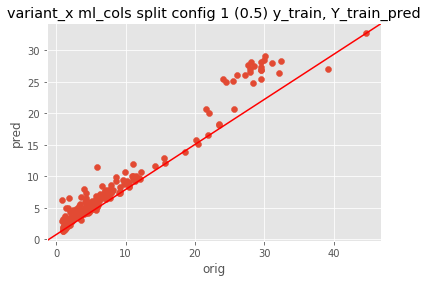

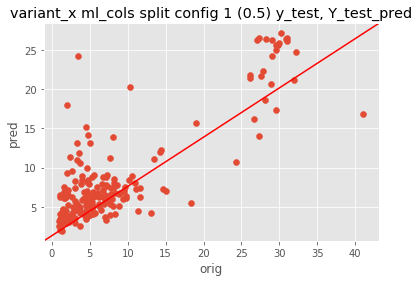

'###########################################'

'# Variant   >> ml_cols  split config 2 (0.4)'

'###########################################'

'variant_x ml_cols split config 2 (0.4)  X.shape (397, 85) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   17.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.2min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

'variant_x ml_cols split config 2 (0.4) X_train.shape (238, 85), X_test.shape (159, 85), Y_train.shape (238,), Y_test.shape (159,)'

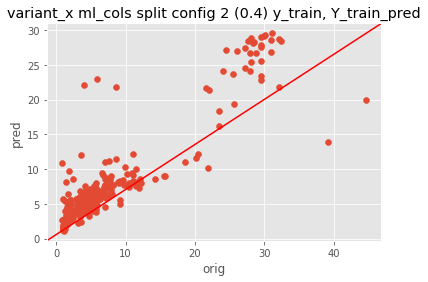

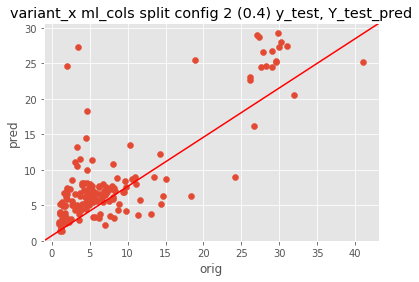

'###########################################'

'# Variant   >> ml_cols  split config 3 (0.3)'

'###########################################'

'variant_x ml_cols split config 3 (0.3)  X.shape (397, 85) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   20.5s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.5min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 433,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 80,
 'bootstrap': False}

'variant_x ml_cols split config 3 (0.3) X_train.shape (277, 85), X_test.shape (120, 85), Y_train.shape (277,), Y_test.shape (120,)'

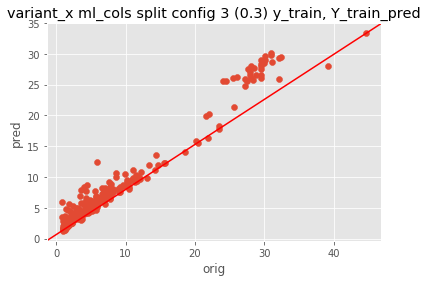

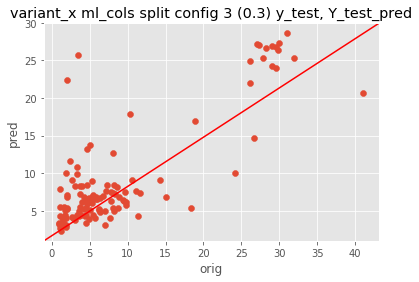

'###########################################'

'# Variant   >> ml_cols  split config 4 (0.2)'

'###########################################'

'variant_x ml_cols split config 4 (0.2)  X.shape (397, 85) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   25.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.8min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 433,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 80,
 'bootstrap': False}

'variant_x ml_cols split config 4 (0.2) X_train.shape (317, 85), X_test.shape (80, 85), Y_train.shape (317,), Y_test.shape (80,)'

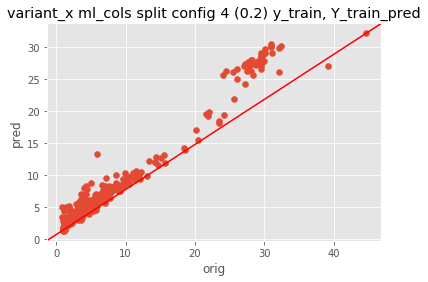

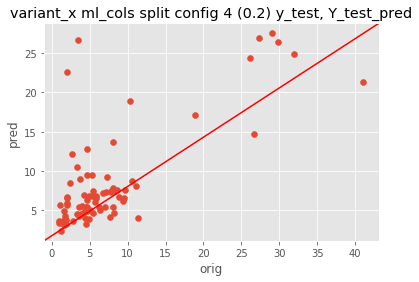

'###########################################'

'# Variant   >> ml_cols_w_dr  split config 1 (0.5)'

'###########################################'

'variant_x ml_cols_w_dr split config 1 (0.5)  X.shape (397, 86) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   16.6s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.1min finished


{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

'variant_x ml_cols_w_dr split config 1 (0.5) X_train.shape (198, 86), X_test.shape (199, 86), Y_train.shape (198,), Y_test.shape (199,)'

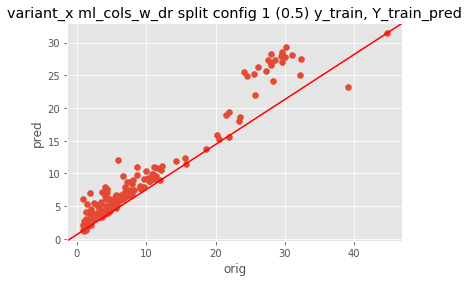

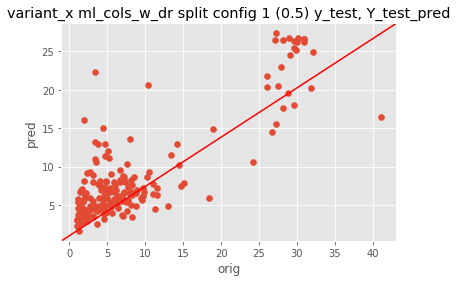

'###########################################'

'# Variant   >> ml_cols_w_dr  split config 2 (0.4)'

'###########################################'

'variant_x ml_cols_w_dr split config 2 (0.4)  X.shape (397, 86) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   18.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.2min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

'variant_x ml_cols_w_dr split config 2 (0.4) X_train.shape (238, 86), X_test.shape (159, 86), Y_train.shape (238,), Y_test.shape (159,)'

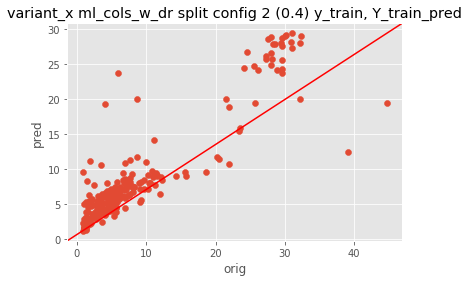

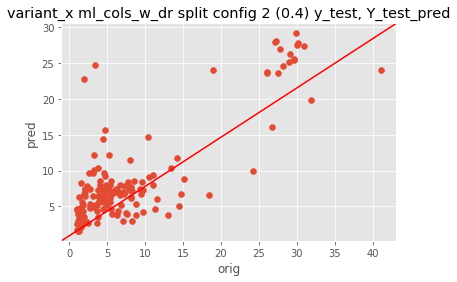

'###########################################'

'# Variant   >> ml_cols_w_dr  split config 3 (0.3)'

'###########################################'

'variant_x ml_cols_w_dr split config 3 (0.3)  X.shape (397, 86) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   19.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.4min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 266,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

'variant_x ml_cols_w_dr split config 3 (0.3) X_train.shape (277, 86), X_test.shape (120, 86), Y_train.shape (277,), Y_test.shape (120,)'

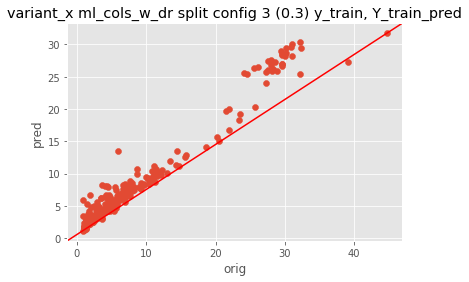

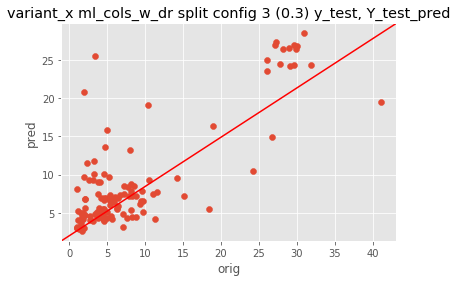

'###########################################'

'# Variant   >> ml_cols_w_dr  split config 4 (0.2)'

'###########################################'

'variant_x ml_cols_w_dr split config 4 (0.2)  X.shape (397, 86) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   20.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.5min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 933,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 50,
 'bootstrap': False}

'variant_x ml_cols_w_dr split config 4 (0.2) X_train.shape (317, 86), X_test.shape (80, 86), Y_train.shape (317,), Y_test.shape (80,)'

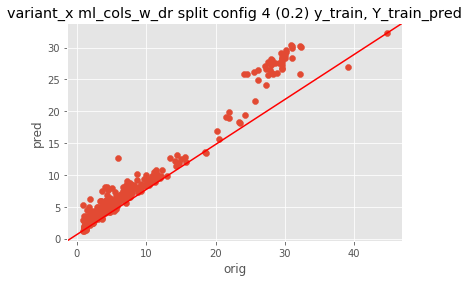

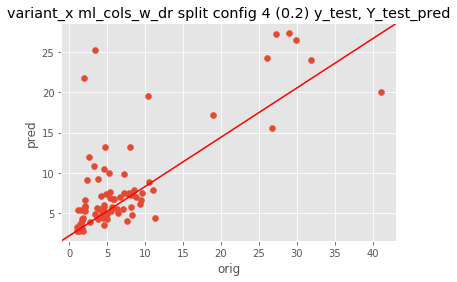

'###########################################'

'# Variant   >> ml_cols_sif  split config 1 (0.5)'

'###########################################'

'variant_x ml_cols_sif split config 1 (0.5)  X.shape (397, 69) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   16.5s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.1min finished


{'n_estimators': 266,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

'variant_x ml_cols_sif split config 1 (0.5) X_train.shape (198, 69), X_test.shape (199, 69), Y_train.shape (198,), Y_test.shape (199,)'

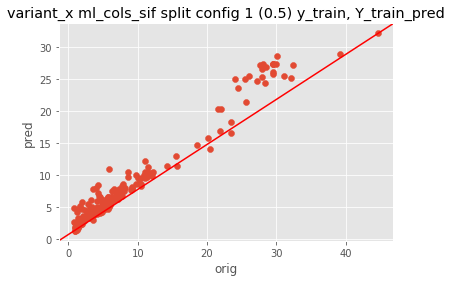

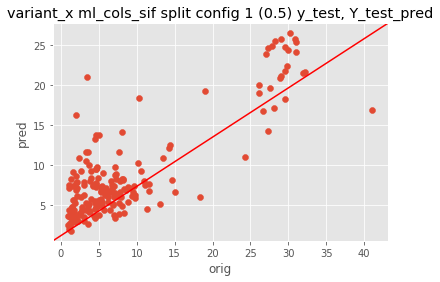

'###########################################'

'# Variant   >> ml_cols_sif  split config 2 (0.4)'

'###########################################'

'variant_x ml_cols_sif split config 2 (0.4)  X.shape (397, 69) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   19.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.4min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

'variant_x ml_cols_sif split config 2 (0.4) X_train.shape (238, 69), X_test.shape (159, 69), Y_train.shape (238,), Y_test.shape (159,)'

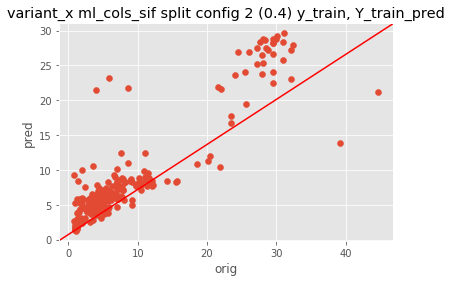

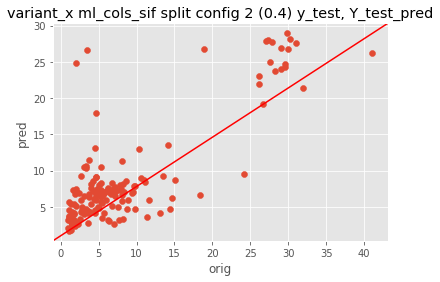

'###########################################'

'# Variant   >> ml_cols_sif  split config 3 (0.3)'

'###########################################'

'variant_x ml_cols_sif split config 3 (0.3)  X.shape (397, 69) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   22.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.8min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

'variant_x ml_cols_sif split config 3 (0.3) X_train.shape (277, 69), X_test.shape (120, 69), Y_train.shape (277,), Y_test.shape (120,)'

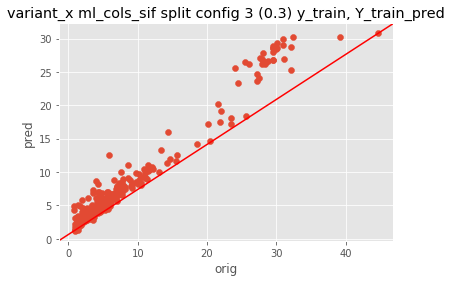

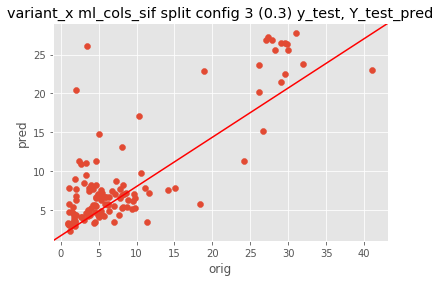

'###########################################'

'# Variant   >> ml_cols_sif  split config 4 (0.2)'

'###########################################'

'variant_x ml_cols_sif split config 4 (0.2)  X.shape (397, 69) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   23.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.9min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 266,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

'variant_x ml_cols_sif split config 4 (0.2) X_train.shape (317, 69), X_test.shape (80, 69), Y_train.shape (317,), Y_test.shape (80,)'

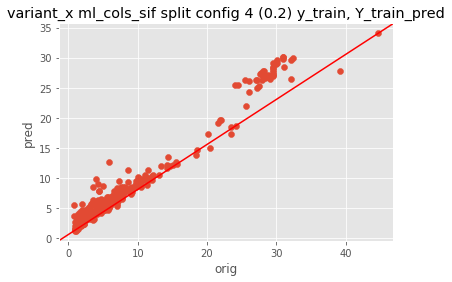

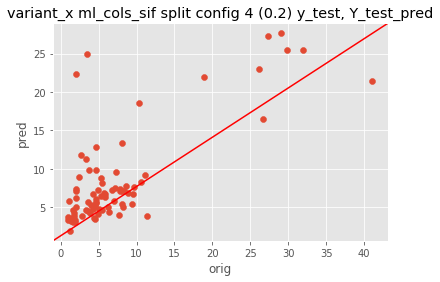

'###########################################'

'# Variant   >> ml_cols_sif_w_dr  split config 1 (0.5)'

'###########################################'

'variant_x ml_cols_sif_w_dr split config 1 (0.5)  X.shape (397, 70) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   16.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.4min finished


{'n_estimators': 266,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

'variant_x ml_cols_sif_w_dr split config 1 (0.5) X_train.shape (198, 70), X_test.shape (199, 70), Y_train.shape (198,), Y_test.shape (199,)'

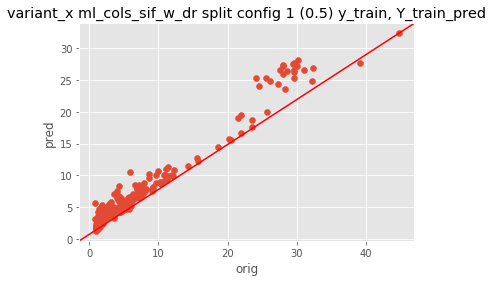

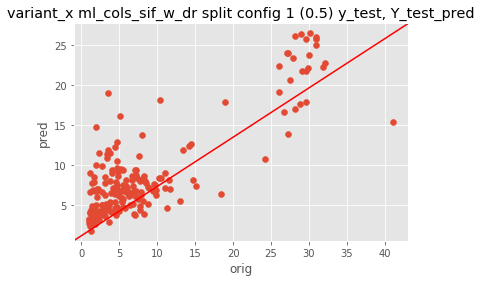

'###########################################'

'# Variant   >> ml_cols_sif_w_dr  split config 2 (0.4)'

'###########################################'

'variant_x ml_cols_sif_w_dr split config 2 (0.4)  X.shape (397, 70) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   23.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.5min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 766,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

'variant_x ml_cols_sif_w_dr split config 2 (0.4) X_train.shape (238, 70), X_test.shape (159, 70), Y_train.shape (238,), Y_test.shape (159,)'

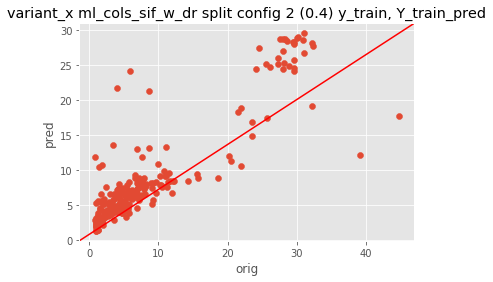

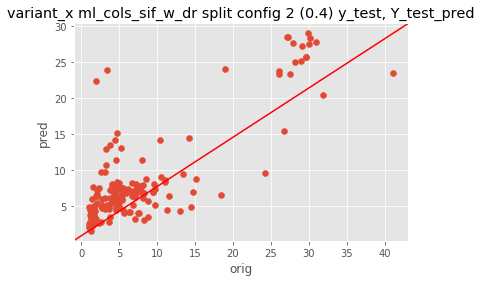

'###########################################'

'# Variant   >> ml_cols_sif_w_dr  split config 3 (0.3)'

'###########################################'

'variant_x ml_cols_sif_w_dr split config 3 (0.3)  X.shape (397, 70) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   18.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.2min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 1433,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

'variant_x ml_cols_sif_w_dr split config 3 (0.3) X_train.shape (277, 70), X_test.shape (120, 70), Y_train.shape (277,), Y_test.shape (120,)'

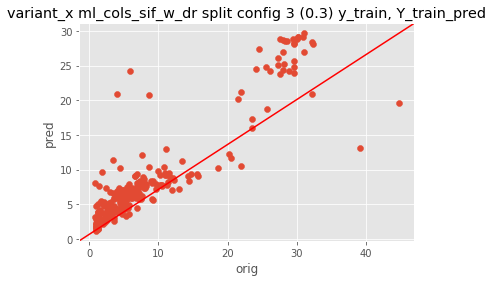

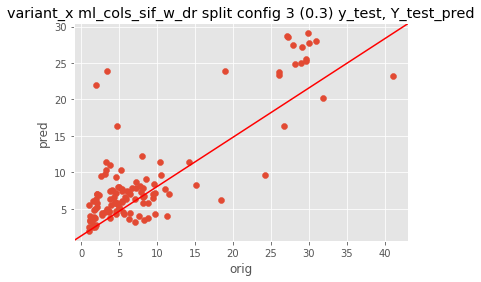

'###########################################'

'# Variant   >> ml_cols_sif_w_dr  split config 4 (0.2)'

'###########################################'

'variant_x ml_cols_sif_w_dr split config 4 (0.2)  X.shape (397, 70) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   18.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.4min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 933,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 50,
 'bootstrap': False}

'variant_x ml_cols_sif_w_dr split config 4 (0.2) X_train.shape (317, 70), X_test.shape (80, 70), Y_train.shape (317,), Y_test.shape (80,)'

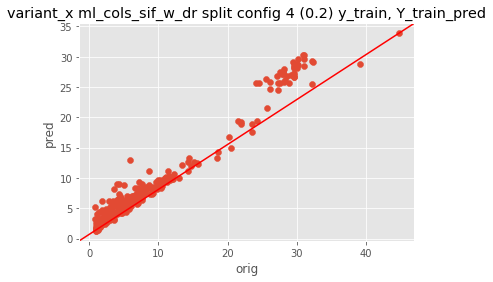

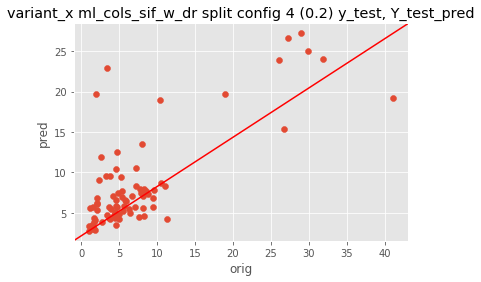

'###########################################'

'# Variant   >> ml_cols_txt  split config 1 (0.5)'

'###########################################'

'variant_x ml_cols_txt split config 1 (0.5)  X.shape (397, 32) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   15.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  1.9min finished


{'n_estimators': 433,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 80,
 'bootstrap': False}

'variant_x ml_cols_txt split config 1 (0.5) X_train.shape (198, 32), X_test.shape (199, 32), Y_train.shape (198,), Y_test.shape (199,)'

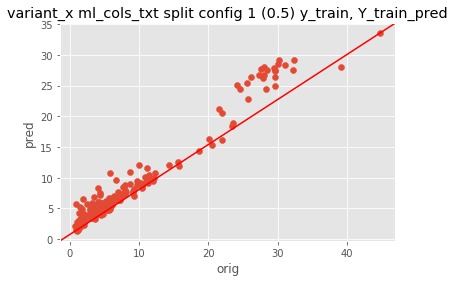

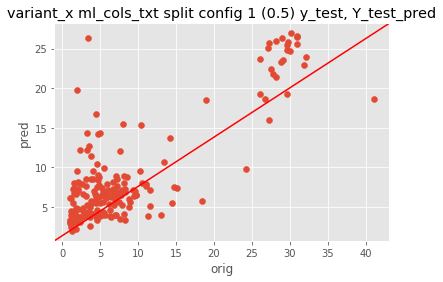

'###########################################'

'# Variant   >> ml_cols_txt  split config 2 (0.4)'

'###########################################'

'variant_x ml_cols_txt split config 2 (0.4)  X.shape (397, 32) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   15.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.1min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

'variant_x ml_cols_txt split config 2 (0.4) X_train.shape (238, 32), X_test.shape (159, 32), Y_train.shape (238,), Y_test.shape (159,)'

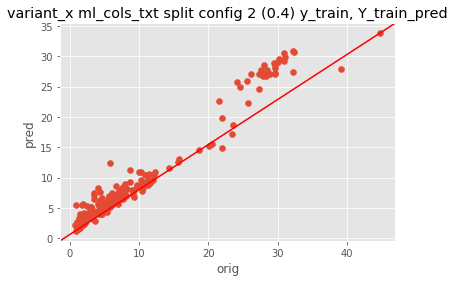

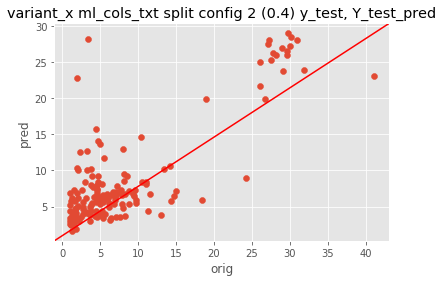

'###########################################'

'# Variant   >> ml_cols_txt  split config 3 (0.3)'

'###########################################'

'variant_x ml_cols_txt split config 3 (0.3)  X.shape (397, 32) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   17.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.2min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 1100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 40,
 'bootstrap': True}

'variant_x ml_cols_txt split config 3 (0.3) X_train.shape (277, 32), X_test.shape (120, 32), Y_train.shape (277,), Y_test.shape (120,)'

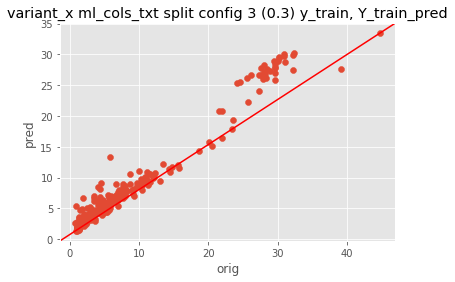

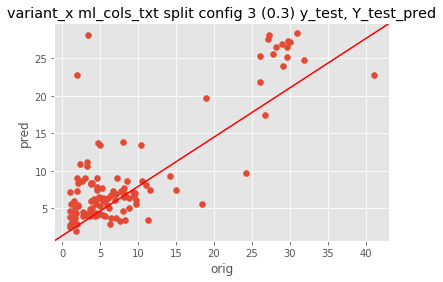

'###########################################'

'# Variant   >> ml_cols_txt  split config 4 (0.2)'

'###########################################'

'variant_x ml_cols_txt split config 4 (0.2)  X.shape (397, 32) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   20.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.5min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 933,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 50,
 'bootstrap': False}

'variant_x ml_cols_txt split config 4 (0.2) X_train.shape (317, 32), X_test.shape (80, 32), Y_train.shape (317,), Y_test.shape (80,)'

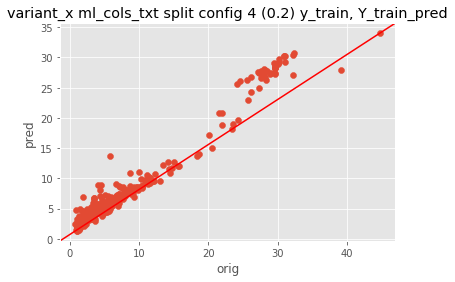

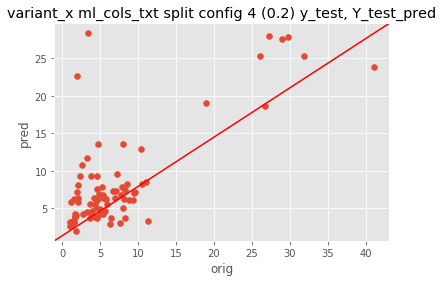

'###########################################'

'# Variant   >> ml_cols_txt_w_dr  split config 1 (0.5)'

'###########################################'

'variant_x ml_cols_txt_w_dr split config 1 (0.5)  X.shape (397, 33) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   16.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.1min finished


{'n_estimators': 933,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 50,
 'bootstrap': False}

'variant_x ml_cols_txt_w_dr split config 1 (0.5) X_train.shape (198, 33), X_test.shape (199, 33), Y_train.shape (198,), Y_test.shape (199,)'

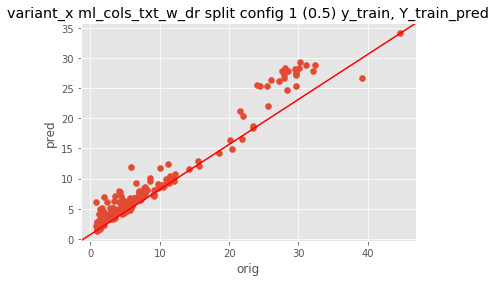

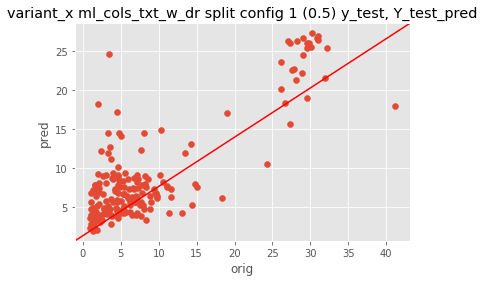

'###########################################'

'# Variant   >> ml_cols_txt_w_dr  split config 2 (0.4)'

'###########################################'

'variant_x ml_cols_txt_w_dr split config 2 (0.4)  X.shape (397, 33) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   19.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.1min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 266,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

'variant_x ml_cols_txt_w_dr split config 2 (0.4) X_train.shape (238, 33), X_test.shape (159, 33), Y_train.shape (238,), Y_test.shape (159,)'

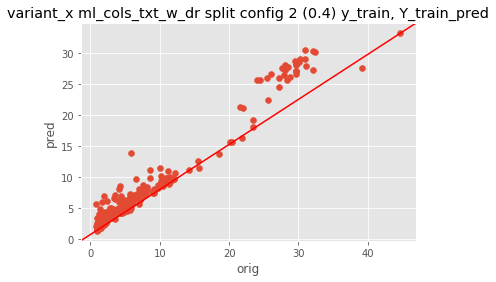

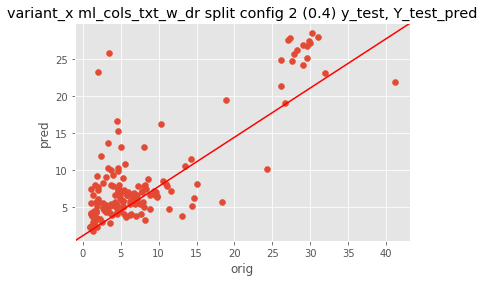

'###########################################'

'# Variant   >> ml_cols_txt_w_dr  split config 3 (0.3)'

'###########################################'

'variant_x ml_cols_txt_w_dr split config 3 (0.3)  X.shape (397, 33) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   17.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.1min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

'variant_x ml_cols_txt_w_dr split config 3 (0.3) X_train.shape (277, 33), X_test.shape (120, 33), Y_train.shape (277,), Y_test.shape (120,)'

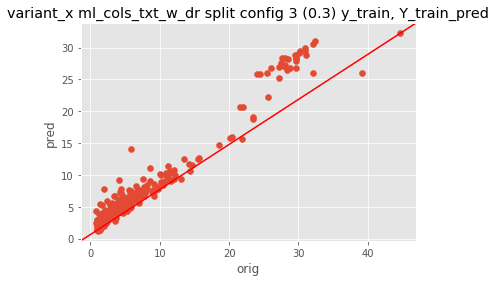

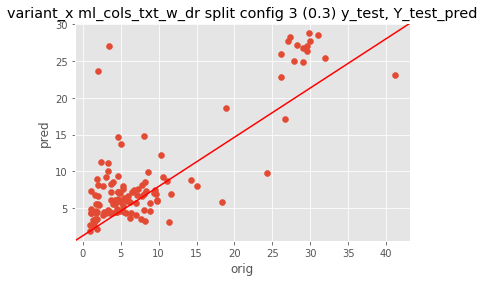

'###########################################'

'# Variant   >> ml_cols_txt_w_dr  split config 4 (0.2)'

'###########################################'

'variant_x ml_cols_txt_w_dr split config 4 (0.2)  X.shape (397, 33) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   17.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.2min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

'variant_x ml_cols_txt_w_dr split config 4 (0.2) X_train.shape (317, 33), X_test.shape (80, 33), Y_train.shape (317,), Y_test.shape (80,)'

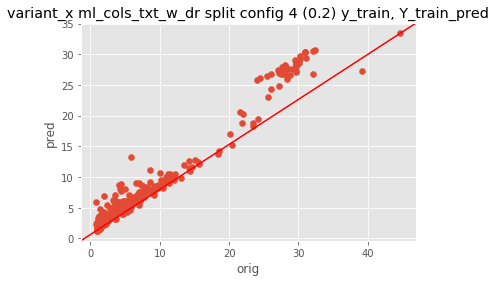

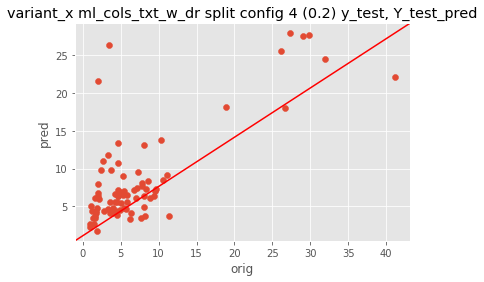

'###########################################'

'# Variant   >> ml_cols_nolab  split config 1 (0.5)'

'###########################################'

'variant_x ml_cols_nolab split config 1 (0.5)  X.shape (397, 16) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   15.6s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  1.9min finished


{'n_estimators': 933,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 80,
 'bootstrap': False}

'variant_x ml_cols_nolab split config 1 (0.5) X_train.shape (198, 16), X_test.shape (199, 16), Y_train.shape (198,), Y_test.shape (199,)'

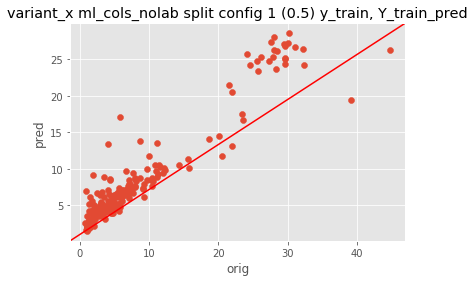

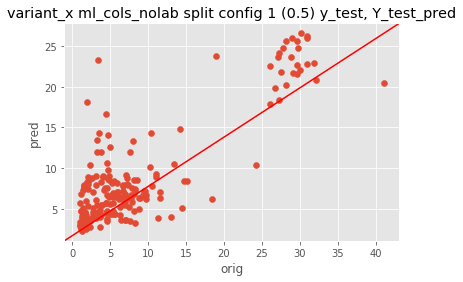

'###########################################'

'# Variant   >> ml_cols_nolab  split config 2 (0.4)'

'###########################################'

'variant_x ml_cols_nolab split config 2 (0.4)  X.shape (397, 16) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   15.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.0min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 1433,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

'variant_x ml_cols_nolab split config 2 (0.4) X_train.shape (238, 16), X_test.shape (159, 16), Y_train.shape (238,), Y_test.shape (159,)'

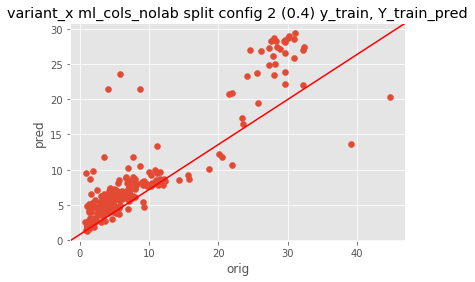

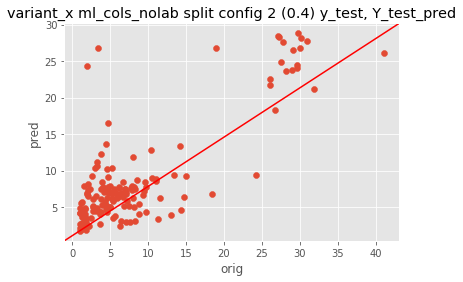

'###########################################'

'# Variant   >> ml_cols_nolab  split config 3 (0.3)'

'###########################################'

'variant_x ml_cols_nolab split config 3 (0.3)  X.shape (397, 16) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   16.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.1min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

'variant_x ml_cols_nolab split config 3 (0.3) X_train.shape (277, 16), X_test.shape (120, 16), Y_train.shape (277,), Y_test.shape (120,)'

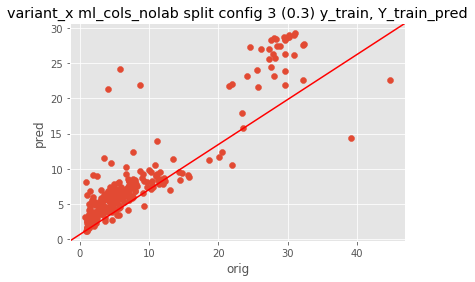

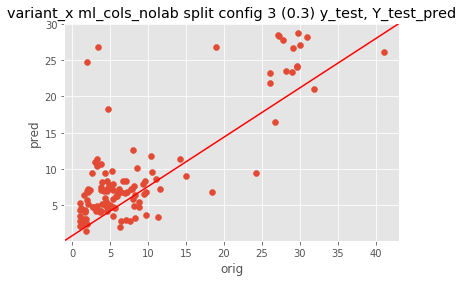

'###########################################'

'# Variant   >> ml_cols_nolab  split config 4 (0.2)'

'###########################################'

'variant_x ml_cols_nolab split config 4 (0.2)  X.shape (397, 16) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   17.5s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.4min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 1100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 40,
 'bootstrap': True}

'variant_x ml_cols_nolab split config 4 (0.2) X_train.shape (317, 16), X_test.shape (80, 16), Y_train.shape (317,), Y_test.shape (80,)'

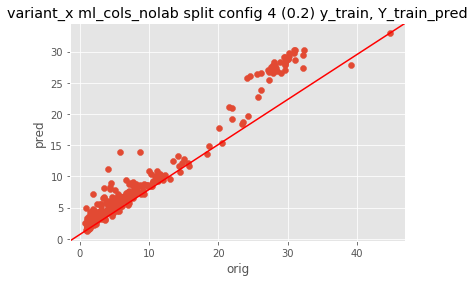

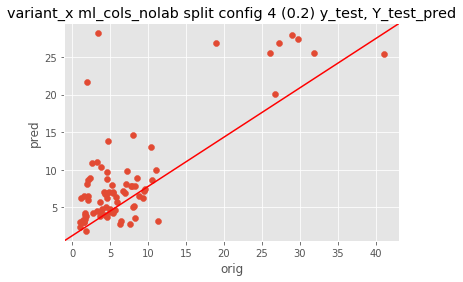

'###########################################'

'# Variant   >> ml_cols_nolab_w_dr  split config 1 (0.5)'

'###########################################'

'variant_x ml_cols_nolab_w_dr split config 1 (0.5)  X.shape (397, 17) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   17.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.1min finished


{'n_estimators': 933,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 50,
 'bootstrap': False}

'variant_x ml_cols_nolab_w_dr split config 1 (0.5) X_train.shape (198, 17), X_test.shape (199, 17), Y_train.shape (198,), Y_test.shape (199,)'

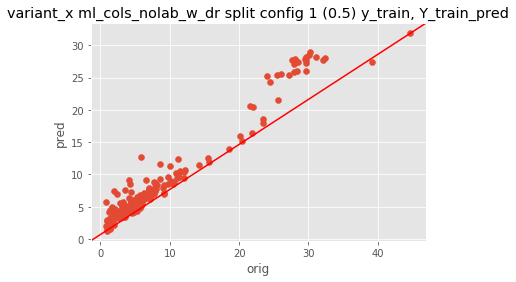

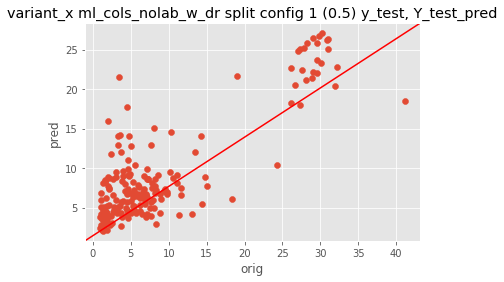

'###########################################'

'# Variant   >> ml_cols_nolab_w_dr  split config 2 (0.4)'

'###########################################'

'variant_x ml_cols_nolab_w_dr split config 2 (0.4)  X.shape (397, 17) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   18.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.2min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 1433,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

'variant_x ml_cols_nolab_w_dr split config 2 (0.4) X_train.shape (238, 17), X_test.shape (159, 17), Y_train.shape (238,), Y_test.shape (159,)'

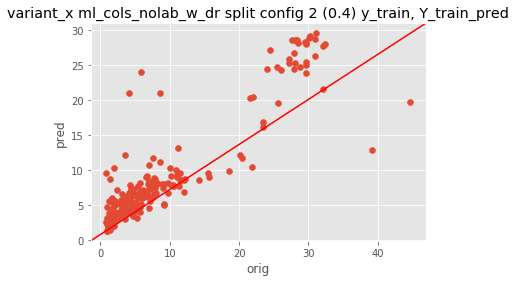

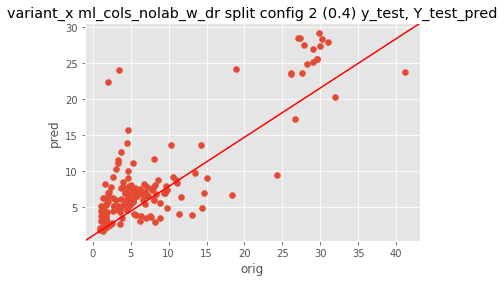

'###########################################'

'# Variant   >> ml_cols_nolab_w_dr  split config 3 (0.3)'

'###########################################'

'variant_x ml_cols_nolab_w_dr split config 3 (0.3)  X.shape (397, 17) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   17.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.2min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 766,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

'variant_x ml_cols_nolab_w_dr split config 3 (0.3) X_train.shape (277, 17), X_test.shape (120, 17), Y_train.shape (277,), Y_test.shape (120,)'

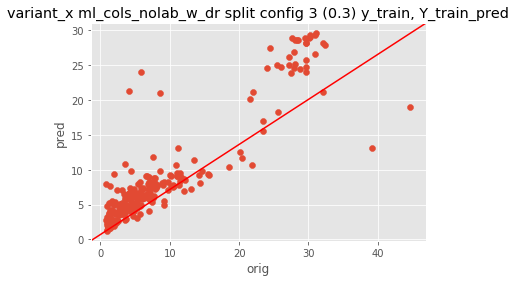

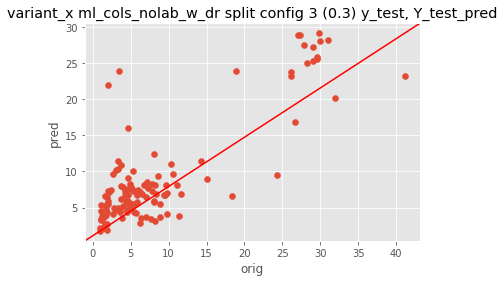

'###########################################'

'# Variant   >> ml_cols_nolab_w_dr  split config 4 (0.2)'

'###########################################'

'variant_x ml_cols_nolab_w_dr split config 4 (0.2)  X.shape (397, 17) Y.shape (397,)'

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   20.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.3min finished
C:\dev\conda3\envs\geopython-environment\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 1100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 40,
 'bootstrap': True}

'variant_x ml_cols_nolab_w_dr split config 4 (0.2) X_train.shape (317, 17), X_test.shape (80, 17), Y_train.shape (317,), Y_test.shape (80,)'

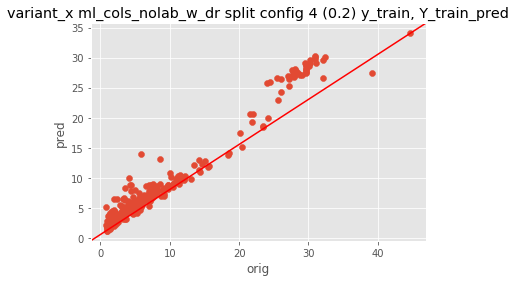

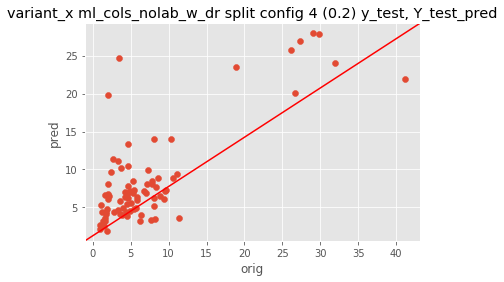

In [4]:
for variant_x in all_variants.keys():
    for num_split in ['1','2','3','4']:
        # which current variant
        test_size = 0.5
        if num_split == "2":
            test_size = 0.4
        elif num_split == "3":
            test_size = 0.3
        elif num_split == "4":
            test_size = 0.2
            
        display('###########################################')
        display(f'# Variant   >> {variant_x}  split config {num_split} ({test_size})')
        display('###########################################')
        ml_cols = all_variants[variant_x]['cols']
        ml_data_pre = data[ml_cols].copy()

        ml_data_pre.dropna(inplace=True)
        # display(ml_data.isnull().sum())

        ml_data = pd.get_dummies(ml_data_pre)
        all_variants[variant_x]['num_cols'] = len(ml_data.columns.tolist())

        # display(ml_data.head(2))
        # display(ml_data.sample(5))
        # display(ml_data.tail(2))

        X = ml_data.drop(columns=['SOC_mean', 'SOC_median','SOC_stddev']).values
        Y = ml_data['SOC_mean'].values
        
        display(f"variant_x {variant_x} split config {num_split} ({test_size})  X.shape {X.shape} Y.shape {Y.shape}")
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=30)
        y_train = np.ravel(Y_train)
        y_test = np.ravel(Y_test)

        # Hyperparameter Tuning

        # Number of trees in random forest
        n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1600, num = 10)]
        # Number of features to consider at every split
        max_features = ['auto', 'sqrt','log2']
        # Maximum number of levels in tree
        max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
        max_depth.append(None)
        # Minimum number of samples required to split a node
        min_samples_split = [2, 5, 10]
        # Minimum number of samples required at each leaf node
        min_samples_leaf = [1, 2, 4]
        # Method of selecting samples for training each tree
        bootstrap = [True, False]
        # Create the random grid
        random_grid = {'n_estimators': n_estimators,
                       'max_features': max_features,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf,
                       'bootstrap': bootstrap}

        # Use the random grid to search for best hyperparameters
        # First create the base model to tune
        rf = RFReg()
        # Random search of parameters, using 3 fold cross validation, 
        # search across 100 different combinations, and use all available cores
        rf_random = RandomizedSearchCV(
            estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=30, n_jobs=4
        )
        # Fit the random search model
        # regressor = RFReg(n_estimators=1000, random_state=30, bootstrap=True, criterion='mse', oob_score=True)
        # regressor.fit(X_train, y_train)
        # for the model tuning
        rf_random.fit(X_train, y_train)

        # Get the best set of parameters
        params = rf_random.best_params_
        all_variants[variant_x][num_split]['params'] = params
        display(params)

        # Need to change these to get the OOB score as an output
        params['bootstrap'] = True
        params['oob_score'] = True

        # Create a model with the best parameters
        regressor = RFReg()
        regressor.set_params(**params)

        # Train the model
        regressor.fit(X_train, y_train)

        display(f"variant_x {variant_x} split config {num_split} ({test_size}) X_train.shape {X_train.shape}, X_test.shape {X_test.shape}, Y_train.shape {Y_train.shape}, Y_test.shape {Y_test.shape}")

        Y_train_pred = regressor.predict(X_train)
        Y_test_pred = regressor.predict(X_test)

        all_variants[variant_x][num_split]['Y_train_pred, y_train, Y_test_pred, y_test'] = [Y_train_pred, y_train, Y_test_pred, y_test]
        all_variants[variant_x][num_split]['pearsons'] = [pearsonr(Y_train_pred, y_train)[0], pearsonr(Y_test_pred, y_test)[0]]

        all_variants[variant_x][num_split]['oob_score_'] = regressor.oob_score_

        all_variants[variant_x][num_split]['r2_score'] = r2_score(y_test, Y_test_pred)
        all_variants[variant_x][num_split]['forest_score'] = regressor.score(X_train, y_train)
        
        display(f"pearsons_train : {all_variants[x][num_split]['pearsons'][0]}, pearsons_test : {all_variants[x][num_split]['pearsons'][1]}")
        display(f"oob_score_ : {all_variants[x][num_split]['oob_score_']}, r2_score : {all_variants[x][num_split]['r2_score']}")
        

        pred_cols = list(ml_data.drop(columns=['SOC_mean', 'SOC_median','SOC_stddev']).columns)
        feat_imp = list(regressor.feature_importances_)
        feat_imp_dict = dict(zip(pred_cols, feat_imp))
        all_variants[variant_x][num_split]['importances'] = []
        for feat in sorted(feat_imp_dict, key=feat_imp_dict.get, reverse=True):
            # display(feat, feat_imp_dict[feat])
            all_variants[variant_x][num_split]['importances'].append((feat, feat_imp_dict[feat]))
        
        fig, ax = plt.subplots()
        ax.scatter(y_train, Y_train_pred)
        ax.set_xlabel('orig')
        ax.set_ylabel('pred')
        line = mlines.Line2D([0, 1], [0, 1], color='red')
        transform = ax.transAxes
        line.set_transform(transform)
        ax.add_line(line)
        plt.title(f"variant_x {variant_x} split config {num_split} ({test_size}) y_train, Y_train_pred")
        plt.show()

        fig, ax = plt.subplots()
        ax.scatter(y_test, Y_test_pred)
        ax.set_xlabel('orig')
        ax.set_ylabel('pred')
        line = mlines.Line2D([0, 1], [0, 1], color='red')
        transform = ax.transAxes
        line.set_transform(transform)
        ax.add_line(line)
        plt.title(f"variant_x {variant_x} split config {num_split} ({test_size}) y_test, Y_test_pred")
        plt.show()


In [ ]:
all_variants

In [44]:
variant_arr = []
num_cols_arr = []

test_split_arr = []

r2_score_arr = []
forest_score_arr = []
oob_score_arr = []
pearsons_test_arr = []
pearsons_train_arr = []

n_estimators_arr = []
min_samples_split_arr = []
min_samples_leaf_arr = []
max_features_arr = []
max_depth_arr = []
bootstrap_arr = []
        
demo = {'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

for num_split in ['1','2','3','4']:
    variant_t = [x for x in all_variants.keys()]
    num_cols_t = [ len(all_variants[x]['cols']) for x in all_variants.keys()]
    test_split_t = [ num_split for x in all_variants.keys()]
    r2_score_t = [all_variants[x][num_split]['r2_score'] for x in all_variants.keys()]
    forest_score_t = [all_variants[x][num_split]['forest_score'] for x in all_variants.keys()]
    oob_score__t = [all_variants[x][num_split]['oob_score_'] for x in all_variants.keys()]
    pearsons_test_t = [all_variants[x][num_split]['pearsons'][1] for x in all_variants.keys()]
    pearsons_train_t = [all_variants[x][num_split]['pearsons'][0] for x in all_variants.keys()]
    
    n_estimators_t = [all_variants[x][num_split]['params'].get('n_estimators') for x in all_variants.keys()]
    min_samples_split_t = [all_variants[x][num_split]['params'].get('min_samples_split') for x in all_variants.keys()]
    min_samples_leaf_t = [all_variants[x][num_split]['params'].get('min_samples_leaf') for x in all_variants.keys()]
    max_features_t = [all_variants[x][num_split]['params'].get('max_features') for x in all_variants.keys()]
    max_depth_t = [all_variants[x][num_split]['params'].get('max_depth') for x in all_variants.keys()]
    bootstrap_t = [all_variants[x][num_split]['params'].get('bootstrap') for x in all_variants.keys()]

    variant_arr = variant_arr + variant_t
    num_cols_arr = num_cols_arr + num_cols_t

    test_split_arr = test_split_arr + test_split_t

    r2_score_arr = r2_score_arr + r2_score_t
    forest_score_arr = forest_score_arr + forest_score_t
    oob_score_arr = oob_score_arr + oob_score__t
    pearsons_test_arr = pearsons_test_arr + pearsons_test_t
    pearsons_train_arr = pearsons_train_arr + pearsons_train_t
    
    n_estimators_arr = n_estimators_arr + n_estimators_t
    min_samples_split_arr = min_samples_split_arr + min_samples_split_t
    min_samples_leaf_arr = min_samples_leaf_arr + min_samples_leaf_t
    max_features_arr = max_features_arr + max_features_t
    max_depth_arr = max_depth_arr + max_depth_t
    bootstrap_arr = bootstrap_arr + bootstrap_t

        
df_conf = {
    'variant': variant_arr,
    'num_cols' : num_cols_arr,
    'test_split' : test_split_arr,
    'r2_score' : r2_score_arr,
    'oob_score' : oob_score_arr,
    'pearsons_test' : pearsons_test_arr,
    'pearsons_train' : pearsons_train_arr,
    'forest_score' : forest_score_arr,
    'n_estimators': n_estimators_arr,
    'min_samples_split': min_samples_split_arr,
    'min_samples_leaf': min_samples_leaf_arr,
    'max_features': max_features_arr,
    'max_depth': max_depth_arr,
    'bootstrap': bootstrap_arr
}

df = pd.DataFrame(df_conf)


add_top_conf = {}

for num_split in ['1','2','3','4']:
    for x in all_variants.keys():
        for top_i in range(0,10):
            col_name_name = f"top_impname_{top_i+1}"
            col_score_name = f"top_impscore_{top_i+1}"
            add_top_conf.update({col_name_name: []})
            add_top_conf.update({col_score_name: []})
            
for num_split in ['1','2','3','4']:
    for x in all_variants.keys():
        imp_arr = all_variants[x][num_split]['importances']

        for top_i in range(0,10):
            imp = imp_arr[top_i]
            col_name_name = f"top_impname_{top_i+1}"
            col_name_val = imp[0]
            add_top_conf[col_name_name].append(col_name_val)
            
            col_score_name = f"top_impscore_{top_i+1}"
            col_score_val = imp[1]
            add_top_conf[col_score_name].append(col_score_val)

df2 = pd.DataFrame(add_top_conf)
df3 = df.join(df2)

pd.set_option('display.max_columns', 50)
display(df3.sort_values(ascending=False, by=['r2_score']))


,variant,num_cols,test_split,r2_score,oob_score,pearsons_test,pearsons_train,forest_score,n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth,bootstrap,top_impname_1,top_impscore_1,top_impname_2,top_impscore_2,top_impname_3,top_impscore_3,top_impname_4,top_impscore_4,top_impname_5,top_impscore_5,top_impname_6,top_impscore_6,top_impname_7,top_impscore_7,top_impname_8,top_impscore_8,top_impname_9,top_impscore_9,top_impname_10,top_impscore_10
1,ml_cols_w_dr,22,1,0.700466,0.545152,0.846716,0.974752,0.930574,100,2,1,sqrt,70.0,True,SOL_CLAY1,0.121830,SOL_SAND1,0.075883,EST_TXT1_t1,0.069704,tri_median,0.068583,upd_siffer_S''',0.044205,ls_mean,0.041970,upd_siffer_R''',0.038823,_mean,0.036511,tri_mean,0.036214,twi_mean,0.035957
19,ml_cols_sif_w_dr,21,3,0.696022,0.603010,0.836463,0.908838,0.817820,1433,2,4,auto,80.0,True,SOL_CLAY1,0.661647,tri_stdev,0.045741,SOL_SAND1,0.029817,drain_prct,0.028398,SOL_ROCK1,0.027222,ls_stdev,0.025383,ls_median,0.022959,ls_mean,0.020367,tri_mean,0.020190,twi_stdev,0.016835
23,ml_cols_nolab_w_dr,20,3,0.694082,0.598326,0.835293,0.907592,0.815682,766,2,4,auto,20.0,True,SOL_CLAY1,0.663981,tri_stdev,0.046308,SOL_ROCK1,0.031066,SOL_SAND1,0.027464,drain_prct,0.027260,ls_stdev,0.026574,ls_median,0.022237,ls_mean,0.021619,tri_mean,0.020469,twi_stdev,0.018671
6,ml_cols_nolab,19,1,0.691851,0.546911,0.842531,0.947027,0.869437,933,2,2,log2,80.0,True,SOL_CLAY1,0.215020,SOL_SAND1,0.140925,tri_mean,0.060793,tri_median,0.060368,ls_median,0.055577,ls_mean,0.052185,_mean,0.048662,_median,0.048412,twi_median,0.048350,tri_stdev,0.047838
0,ml_cols,21,1,0.691211,0.573117,0.839494,0.981031,0.942247,1600,2,1,sqrt,NaN,True,SOL_CLAY1,0.103414,EST_TXT1_t1,0.085141,SOL_SAND1,0.080445,tri_mean,0.045642,tri_median,0.044911,ls_median,0.042639,_median,0.042494,ls_mean,0.040789,_mean,0.040094,upd_siffer_R''',0.040045
7,ml_cols_nolab_w_dr,20,1,0.690258,0.541275,0.841784,0.978368,0.938164,933,2,1,log2,50.0,True,SOL_CLAY1,0.189474,SOL_SAND1,0.131156,tri_mean,0.058502,ls_median,0.057325,_median,0.056564,tri_median,0.054248,ls_mean,0.050536,_mean,0.047642,tri_stdev,0.046609,SOL_SILT1,0.044924
15,ml_cols_nolab_w_dr,20,2,0.690254,0.583735,0.833736,0.902535,0.806334,1433,2,4,auto,80.0,True,SOL_CLAY1,0.658307,tri_stdev,0.044536,SOL_SAND1,0.031928,ls_median,0.029182,drain_prct,0.027337,SOL_ROCK1,0.024228,tri_mean,0.023647,ls_stdev,0.019948,SOL_SILT1,0.019397,twi_median,0.018999
5,ml_cols_txt_w_dr,21,1,0.687735,0.578530,0.837174,0.980196,0.943840,933,2,1,log2,50.0,True,SOL_CLAY1,0.143889,SOL_SAND1,0.100784,EST_TXT1_t1,0.092258,ls_median,0.051400,tri_mean,0.051396,tri_median,0.049568,ls_mean,0.047219,_mean,0.046730,_median,0.046188,tri_stdev,0.041892
11,ml_cols_sif_w_dr,21,2,0.687509,0.574565,0.832286,0.886192,0.778725,766,10,4,auto,NaN,True,SOL_CLAY1,0.674341,SOL_SAND1,0.040699,tri_stdev,0.037753,drain_prct,0.029463,ls_median,0.027165,tri_mean,0.022660,SOL_ROCK1,0.022042,SOL_SILT1,0.019860,twi_stdev,0.016316,tri_median,0.015499
2,ml_cols_sif,20,1,0.686029,0.554932,0.846187,0.982141,0.939281,266,2,1,log2,NaN,True,SOL_CLAY1,0.102164,SOL_SAND1,0.085908,upd_siffer_R''',0.061527,ls_median,0.057349,_median,0.050583,tri_median,0.049787,ls_mean,0.047032,tri_mean,0.046833,tri_stdev,0.045576,_mean,0.044524


In [45]:
df3.to_csv('soc_rf/4-fold-8-variants-search-cv-results_3params.csv')

for x in all_variants.keys():
    for num_split in ['1','2','3','4']:
        # which current variant
        print('###########################################')
        print(f'# Variant   >> {x}  split config {num_split}')
        print('###########################################')
        print(f"pearsons_train : {all_variants[x][num_split]['pearsons'][0]}, pearsons_test : {all_variants[x][num_split]['pearsons'][1]}")
        print(f"oob_score_ : {all_variants[x][num_split]['oob_score_']}, r2_score : {all_variants[x][num_split]['r2_score']}")
        counter = 0
        for imp in all_variants[x][num_split]['importances']:
            display(f"{imp[0]} : {imp[1]}")
            counter = counter + 1
            if counter > 3:
                break

###########################################
# Variant   >> ml_cols  split config 1
###########################################
pearsons_train : 0.9810310482112852, pearsons_test : 0.8394941089327331
oob_score_ : 0.5731170941185437, r2_score : 0.6912107903265987


'SOL_CLAY1 : 0.10341413960398403'

'EST_TXT1_t1 : 0.0851409449137208'

'SOL_SAND1 : 0.0804446109890517'

'tri_mean : 0.045642139566507964'

###########################################
# Variant   >> ml_cols  split config 2
###########################################
pearsons_train : 0.9020017154900702, pearsons_test : 0.8156985673188508
oob_score_ : 0.5820810587614891, r2_score : 0.6617430217935144


'SOL_CLAY1 : 0.6539638632261138'

'tri_stdev : 0.052710733833265494'

'SOL_SAND1 : 0.033205017883176195'

'ls_median : 0.030227046543865224'

###########################################
# Variant   >> ml_cols  split config 3
###########################################
pearsons_train : 0.9833281565360148, pearsons_test : 0.8209662913165462
oob_score_ : 0.6458863513061248, r2_score : 0.6709648171247706


'SOL_CLAY1 : 0.11589400550938221'

'SOL_SAND1 : 0.08963216621930037'

'EST_TXT1_t1 : 0.07403794782636809'

'twi_median : 0.04637691291156547'

###########################################
# Variant   >> ml_cols  split config 4
###########################################
pearsons_train : 0.9842350052139305, pearsons_test : 0.7430659999209269
oob_score_ : 0.6976829901097443, r2_score : 0.5301158922141286


'SOL_CLAY1 : 0.12125812289458301'

'SOL_SAND1 : 0.09634441295968'

'EST_TXT1_t1 : 0.06415399897363527'

'ls_median : 0.0524815945881804'

###########################################
# Variant   >> ml_cols_w_dr  split config 1
###########################################
pearsons_train : 0.9747521351194758, pearsons_test : 0.8467164887400944
oob_score_ : 0.5451515833173395, r2_score : 0.7004664185766616


'SOL_CLAY1 : 0.12183049033240594'

'SOL_SAND1 : 0.07588304972140102'

'EST_TXT1_t1 : 0.0697044096440416'

'tri_median : 0.06858334379165654'

###########################################
# Variant   >> ml_cols_w_dr  split config 2
###########################################
pearsons_train : 0.9024801954904405, pearsons_test : 0.8298026332675597
oob_score_ : 0.5773345437888188, r2_score : 0.6832571861955048


'SOL_CLAY1 : 0.635313167385893'

'tri_stdev : 0.045782446542618115'

'drain_prct : 0.03071725338960035'

'ls_median : 0.027470115742966376'

###########################################
# Variant   >> ml_cols_w_dr  split config 3
###########################################
pearsons_train : 0.981621448228077, pearsons_test : 0.8154516438833807
oob_score_ : 0.6417995561834061, r2_score : 0.6607997367927507


'SOL_CLAY1 : 0.10542380795986493'

'SOL_SAND1 : 0.09828707894634976'

'EST_TXT1_t1 : 0.06064713960625913'

'twi_median : 0.05213568750948356'

###########################################
# Variant   >> ml_cols_w_dr  split config 4
###########################################
pearsons_train : 0.9843676725110965, pearsons_test : 0.7464980145782213
oob_score_ : 0.6882411950827796, r2_score : 0.5361621849126741


'SOL_CLAY1 : 0.11371185775391898'

'SOL_SAND1 : 0.10269916142635742'

'EST_TXT1_t1 : 0.06918885420587069'

'_median : 0.04801565181814719'

###########################################
# Variant   >> ml_cols_sif  split config 1
###########################################
pearsons_train : 0.9821414715247435, pearsons_test : 0.8461873914672312
oob_score_ : 0.5549320774569908, r2_score : 0.686029246857216


'SOL_CLAY1 : 0.1021643604171978'

'SOL_SAND1 : 0.08590775045695326'

"upd_siffer_R''' : 0.06152698889229309"

'ls_median : 0.05734893413686575'

###########################################
# Variant   >> ml_cols_sif  split config 2
###########################################
pearsons_train : 0.9056521341763513, pearsons_test : 0.8270877169976519
oob_score_ : 0.5826156570742467, r2_score : 0.6805430414101066


'SOL_CLAY1 : 0.6500536842089037'

'tri_stdev : 0.05647478356009186'

'SOL_SAND1 : 0.04228186303425766'

'ls_median : 0.027237314975416815'

###########################################
# Variant   >> ml_cols_sif  split config 3
###########################################
pearsons_train : 0.9821499300367688, pearsons_test : 0.8241772059152723
oob_score_ : 0.6151548225815455, r2_score : 0.6759768223963993


'SOL_CLAY1 : 0.17178465369995888'

'SOL_SAND1 : 0.13987350126201464'

'ls_median : 0.05122696748915212'

'tri_mean : 0.04668525271490458'

###########################################
# Variant   >> ml_cols_sif  split config 4
###########################################
pearsons_train : 0.9848186112502139, pearsons_test : 0.7571333504923916
oob_score_ : 0.6865457474696338, r2_score : 0.5503354310545496


'SOL_CLAY1 : 0.1425872278789651'

'SOL_SAND1 : 0.1265082033836303'

'_median : 0.05192120699748837'

'tri_mean : 0.050151559137760836'

###########################################
# Variant   >> ml_cols_sif_w_dr  split config 1
###########################################
pearsons_train : 0.9826655453622374, pearsons_test : 0.8469112983720748
oob_score_ : 0.5296528799475959, r2_score : 0.682605127988829


'SOL_CLAY1 : 0.09905121816380823'

'SOL_SAND1 : 0.08478275148368862'

'tri_mean : 0.05877192835115534'

'ls_median : 0.05421138571782658'

###########################################
# Variant   >> ml_cols_sif_w_dr  split config 2
###########################################
pearsons_train : 0.8861917555580902, pearsons_test : 0.8322860818239464
oob_score_ : 0.5745654871168911, r2_score : 0.6875085174401663


'SOL_CLAY1 : 0.6743407684904619'

'SOL_SAND1 : 0.04069909341109107'

'tri_stdev : 0.037753418988582595'

'drain_prct : 0.029463491689934753'

###########################################
# Variant   >> ml_cols_sif_w_dr  split config 3
###########################################
pearsons_train : 0.9088377724387019, pearsons_test : 0.8364626173861468
oob_score_ : 0.6030096093503653, r2_score : 0.6960216431034884


'SOL_CLAY1 : 0.6616465022391198'

'tri_stdev : 0.04574069930522275'

'SOL_SAND1 : 0.029817132760646268'

'drain_prct : 0.02839791593923981'

###########################################
# Variant   >> ml_cols_sif_w_dr  split config 4
###########################################
pearsons_train : 0.9849822653303467, pearsons_test : 0.764446707869043
oob_score_ : 0.6711996472993094, r2_score : 0.5669786383618935


'SOL_CLAY1 : 0.13355081852458892'

'SOL_SAND1 : 0.11850582363809586'

'_median : 0.051530458868113284'

'tri_median : 0.050487184271618954'

###########################################
# Variant   >> ml_cols_txt  split config 1
###########################################
pearsons_train : 0.9819771567532153, pearsons_test : 0.8291682214345516
oob_score_ : 0.5923772395654112, r2_score : 0.6778872820489319


'SOL_CLAY1 : 0.14230383923021447'

'SOL_SAND1 : 0.09721110944725027'

'EST_TXT1_t1 : 0.08705191962491125'

'ls_median : 0.05784428162341087'

###########################################
# Variant   >> ml_cols_txt  split config 2
###########################################
pearsons_train : 0.9820711284455096, pearsons_test : 0.8177086243665336
oob_score_ : 0.6391701490906125, r2_score : 0.6640614255564852


'SOL_CLAY1 : 0.1538046858282361'

'SOL_SAND1 : 0.1245265655059647'

'EST_TXT1_t1 : 0.08861841682878081'

'ls_median : 0.0595588251102664'

###########################################
# Variant   >> ml_cols_txt  split config 3
###########################################
pearsons_train : 0.9823239462791544, pearsons_test : 0.8204569786821526
oob_score_ : 0.6573971993653676, r2_score : 0.6706213209061542


'SOL_CLAY1 : 0.16646750496830026'

'SOL_SAND1 : 0.12306201748008623'

'EST_TXT1_t1 : 0.08022845033658359'

'ls_median : 0.050952251988849326'

###########################################
# Variant   >> ml_cols_txt  split config 4
###########################################
pearsons_train : 0.9841413540856887, pearsons_test : 0.7584024427445
oob_score_ : 0.7045003408347812, r2_score : 0.5483436641897101


'SOL_CLAY1 : 0.17525408555416366'

'SOL_SAND1 : 0.1293417290159831'

'EST_TXT1_t1 : 0.09850954734989273'

'tri_mean : 0.05020308682001736'

###########################################
# Variant   >> ml_cols_txt_w_dr  split config 1
###########################################
pearsons_train : 0.980195547723947, pearsons_test : 0.8371737484691717
oob_score_ : 0.5785295434641539, r2_score : 0.6877348235905276


'SOL_CLAY1 : 0.14388919754352228'

'SOL_SAND1 : 0.10078361821940203'

'EST_TXT1_t1 : 0.09225834371065988'

'ls_median : 0.05140020315235278'

###########################################
# Variant   >> ml_cols_txt_w_dr  split config 2
###########################################
pearsons_train : 0.9811939161578674, pearsons_test : 0.818121460712101
oob_score_ : 0.625079174994895, r2_score : 0.6634845830014775


'SOL_CLAY1 : 0.18691142908563063'

'SOL_SAND1 : 0.10715210620464607'

'EST_TXT1_t1 : 0.07919082839384305'

'ls_median : 0.05514942556680559'

###########################################
# Variant   >> ml_cols_txt_w_dr  split config 3
###########################################
pearsons_train : 0.9795759391611724, pearsons_test : 0.8237806918368725
oob_score_ : 0.6432925209622171, r2_score : 0.6741128278342874


'SOL_CLAY1 : 0.19779219057058334'

'SOL_SAND1 : 0.11603427744180068'

'EST_TXT1_t1 : 0.1128928228603013'

'tri_mean : 0.05081334325503265'

###########################################
# Variant   >> ml_cols_txt_w_dr  split config 4
###########################################
pearsons_train : 0.983803842023194, pearsons_test : 0.7617030759404425
oob_score_ : 0.6936332196283166, r2_score : 0.5565105446840428


'SOL_CLAY1 : 0.18246832310970798'

'SOL_SAND1 : 0.13346463722669427'

'EST_TXT1_t1 : 0.08910023271111919'

'tri_mean : 0.048374040429953455'

###########################################
# Variant   >> ml_cols_nolab  split config 1
###########################################
pearsons_train : 0.9470271795129998, pearsons_test : 0.842530607991394
oob_score_ : 0.5469114192230297, r2_score : 0.6918506383979954


'SOL_CLAY1 : 0.2150200647944156'

'SOL_SAND1 : 0.14092521780748618'

'tri_mean : 0.0607930991464515'

'tri_median : 0.06036822249464833'

###########################################
# Variant   >> ml_cols_nolab  split config 2
###########################################
pearsons_train : 0.9043533224281961, pearsons_test : 0.822221869639929
oob_score_ : 0.5897779809369181, r2_score : 0.6727378793842103


'SOL_CLAY1 : 0.6536791280097585'

'tri_stdev : 0.051249754903676906'

'SOL_SAND1 : 0.03257234713544518'

'ls_median : 0.03223227373750841'

###########################################
# Variant   >> ml_cols_nolab  split config 3
###########################################
pearsons_train : 0.9125515503683599, pearsons_test : 0.8144460229397796
oob_score_ : 0.6191336636414801, r2_score : 0.6602169123207351


'SOL_CLAY1 : 0.6407944648726963'

'tri_stdev : 0.06400625402688488'

'SOL_SAND1 : 0.04740601160539344'

'SOL_ROCK1 : 0.032031136251752274'

###########################################
# Variant   >> ml_cols_nolab  split config 4
###########################################
pearsons_train : 0.9822082282820435, pearsons_test : 0.7676068120431977
oob_score_ : 0.6761139061190566, r2_score : 0.5472407016783278


'SOL_CLAY1 : 0.23559822010692508'

'SOL_SAND1 : 0.1754295100630429'

'_median : 0.057955494737034506'

'tri_median : 0.04976031668797275'

###########################################
# Variant   >> ml_cols_nolab_w_dr  split config 1
###########################################
pearsons_train : 0.9783676615861269, pearsons_test : 0.8417843089807445
oob_score_ : 0.5412745439988161, r2_score : 0.6902581628324587


'SOL_CLAY1 : 0.18947360624160162'

'SOL_SAND1 : 0.131155833482955'

'tri_mean : 0.05850219358868164'

'ls_median : 0.057324614280375934'

###########################################
# Variant   >> ml_cols_nolab_w_dr  split config 2
###########################################
pearsons_train : 0.9025350941620862, pearsons_test : 0.8337364020041355
oob_score_ : 0.5837352973360619, r2_score : 0.6902535956596385


'SOL_CLAY1 : 0.6583069139196169'

'tri_stdev : 0.04453567605999641'

'SOL_SAND1 : 0.03192800405184652'

'ls_median : 0.029182181808605955'

###########################################
# Variant   >> ml_cols_nolab_w_dr  split config 3
###########################################
pearsons_train : 0.9075924498082056, pearsons_test : 0.8352933573475507
oob_score_ : 0.5983255057935932, r2_score : 0.694081730045217


'SOL_CLAY1 : 0.6639805846796042'

'tri_stdev : 0.04630834366524563'

'SOL_ROCK1 : 0.031065841476501717'

'SOL_SAND1 : 0.027463599577256623'

###########################################
# Variant   >> ml_cols_nolab_w_dr  split config 4
###########################################
pearsons_train : 0.9828558346507066, pearsons_test : 0.778187214330508
oob_score_ : 0.6745311742789954, r2_score : 0.5776037541828469


'SOL_CLAY1 : 0.2412314397695839'

'SOL_SAND1 : 0.16419559898306105'

'ls_median : 0.05298866204133068'

'_median : 0.052482278078656366'

In [30]:
ml_data_pre = data[ml_cols_nolab + ['geometry']].copy()
ml_data_pre.dropna(inplace=True)

X1 = ml_data.drop(columns=['SOC_mean', 'SOC_median','SOC_stddev']).values
Y1 = ml_data['SOC_mean'].values
        
data2 = (np.array([1, 3, 5, 7]), np.array([0, 2, 4, 6]), np.array([0, 2, 4, 6]) )
coordinates2 = (np.arange(4), np.arange(-4, 0))

weights2 = (np.array([1, 1, 2, 1]), np.array([1, 2, 1, 1]),  np.array([1, 2, 1, 1]))
train2, test2 = vd.train_test_split(coordinates2, data2, weights2, random_state=30)

In [31]:
data2

(array([1, 3, 5, 7]), array([0, 2, 4, 6]), array([0, 2, 4, 6]))

In [32]:
coordinates2

(array([0, 1, 2, 3]), array([-4, -3, -2, -1]))

In [33]:
train2

((array([2, 3, 1]), array([-2, -1, -3])),
 (array([5, 7, 3]), array([4, 6, 2]), array([4, 6, 2])),
 (array([2, 1, 1]), array([1, 1, 2]), array([1, 1, 2])))

In [34]:
test2


((array([0]), array([-4])),
 (array([1]), array([0]), array([0])),
 (array([1]), array([1]), array([1])))

In [39]:
x_coords = ml_data_pre['geometry'].apply(lambda x: x.centroid.x).values
y_coords = ml_data_pre['geometry'].apply(lambda x: x.centroid.y).values
coordinates = (x_coords, y_coords)
display(coordinates[1].shape)

(397,)

In [37]:
train3, test3 = vd.train_test_split(coordinates, X1, None, random_state=30)

ValueError: Coordinate and data arrays must have the same shape.

In [43]:
X1

array([[1.50000000e+01, 2.00000000e+01, 6.50000000e+01, ...,
        1.57520099e+23, 6.91962641e+23, 0.00000000e+00],
       [9.00000000e+00, 9.00000000e+00, 8.20000000e+01, ...,
        3.28453660e+00, 3.71989333e-01, 0.00000000e+00],
       [9.00000000e+00, 9.00000000e+00, 8.20000000e+01, ...,
        3.21000859e-01, 3.65160787e-01, 0.00000000e+00],
       ...,
       [5.00000000e+01, 2.50000000e+01, 2.50000000e+01, ...,
        5.03997207e-01, 3.29890359e-01, 0.00000000e+00],
       [5.00000000e+01, 2.50000000e+01, 2.50000000e+01, ...,
        2.24917814e-01, 2.24128194e-01, 0.00000000e+00],
       [5.00000000e+01, 2.50000000e+01, 2.50000000e+01, ...,
        3.97708789e-01, 2.64782395e-01, 1.16733000e+00]])

In [16]:
df3 = pd.read_csv('soc_rf/4-fold-8-variants-search-cv-results_3params.csv')
pd.set_option('display.max_columns', 50)
df4 = df3[df3['r2_score'] > 0.6]
df4 = df4[df4['pearsons_train'] < 0.95]
df4 = df4[df4['pearsons_test'] > 0.8]
df4 = df4[df4['oob_score'] > 0.58]
display(df4.sort_values(ascending=False, by=['r2_score']))

,Unnamed: 0,variant,num_cols,test_split,r2_score,oob_score,pearsons_test,pearsons_train,forest_score,n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth,bootstrap,top_impname_1,top_impscore_1,top_impname_2,top_impscore_2,top_impname_3,top_impscore_3,top_impname_4,top_impscore_4,top_impname_5,top_impscore_5,top_impname_6,top_impscore_6,top_impname_7,top_impscore_7,top_impname_8,top_impscore_8,top_impname_9,top_impscore_9,top_impname_10,top_impscore_10
19,19,ml_cols_sif_w_dr,21,3,0.696022,0.603010,0.836463,0.908838,0.817820,1433,2,4,auto,80.0,True,SOL_CLAY1,0.661647,tri_stdev,0.045741,SOL_SAND1,0.029817,drain_prct,0.028398,SOL_ROCK1,0.027222,ls_stdev,0.025383,ls_median,0.022959,ls_mean,0.020367,tri_mean,0.020190,twi_stdev,0.016835
23,23,ml_cols_nolab_w_dr,20,3,0.694082,0.598326,0.835293,0.907592,0.815682,766,2,4,auto,20.0,True,SOL_CLAY1,0.663981,tri_stdev,0.046308,SOL_ROCK1,0.031066,SOL_SAND1,0.027464,drain_prct,0.027260,ls_stdev,0.026574,ls_median,0.022237,ls_mean,0.021619,tri_mean,0.020469,twi_stdev,0.018671
15,15,ml_cols_nolab_w_dr,20,2,0.690254,0.583735,0.833736,0.902535,0.806334,1433,2,4,auto,80.0,True,SOL_CLAY1,0.658307,tri_stdev,0.044536,SOL_SAND1,0.031928,ls_median,0.029182,drain_prct,0.027337,SOL_ROCK1,0.024228,tri_mean,0.023647,ls_stdev,0.019948,SOL_SILT1,0.019397,twi_median,0.018999
10,10,ml_cols_sif,20,2,0.680543,0.582616,0.827088,0.905652,0.812909,100,5,4,auto,30.0,True,SOL_CLAY1,0.650054,tri_stdev,0.056475,SOL_SAND1,0.042282,ls_median,0.027237,ls_stdev,0.026377,twi_median,0.025169,SOL_ROCK1,0.024864,twi_stdev,0.022960,tri_mean,0.022935,_median,0.018923
14,14,ml_cols_nolab,19,2,0.672738,0.589778,0.822222,0.904353,0.809475,1433,2,4,auto,80.0,True,SOL_CLAY1,0.653679,tri_stdev,0.051250,SOL_SAND1,0.032572,ls_median,0.032232,SOL_ROCK1,0.026650,tri_mean,0.025497,ls_stdev,0.024103,SOL_SILT1,0.023970,twi_median,0.020790,twi_stdev,0.019700
8,8,ml_cols,21,2,0.661743,0.582081,0.815699,0.902002,0.807149,100,5,4,auto,30.0,True,SOL_CLAY1,0.653964,tri_stdev,0.052711,SOL_SAND1,0.033205,ls_median,0.030227,SOL_ROCK1,0.021821,tri_median,0.020477,tri_mean,0.019538,_stdev,0.018561,twi_stdev,0.017540,ls_stdev,0.016426
22,22,ml_cols_nolab,19,3,0.660217,0.619134,0.814446,0.912552,0.825023,100,5,4,auto,30.0,True,SOL_CLAY1,0.640794,tri_stdev,0.064006,SOL_SAND1,0.047406,SOL_ROCK1,0.032031,ls_stdev,0.028977,ls_median,0.023496,twi_stdev,0.021775,tri_mean,0.020450,twi_median,0.018031,_stdev,0.017930


In [17]:
#######
# apply to rest of the whole
#####

shape_export_texture_values = 'eesti_soil_red1_texture_overview_fix_geo_drain.shp'
eesti_soil_red1 = gpd.read_file(shape_export_texture_values, encoding='utf-8')

In [18]:
soils_joined_drain = 'soc_rf/soil_drainge_merged_ml.shp' 

data = gpd.read_file(soils_joined_drain, encoding='utf-8')

SOL_CLAY1     0
SOL_SILT1     0
SOL_SAND1     0
SOL_ROCK1     0
_mean         0
_median       0
_stdev        0
twi_mean      0
twi_median    0
twi_stdev     0
ls_mean       0
ls_median     0
ls_stdev      0
tri_mean      0
tri_median    0
tri_stdev     0
drain_prct    0
SOC_mean      0
dtype: int64

0.6926063795782914

0.5995431796653619

0.9096306289138526

0.8344125734052815

SOL_CLAY1 0.6570492260351706
tri_stdev 0.04663238205192219
SOL_SAND1 0.030131202893891876
drain_prct 0.029488325544993713
SOL_ROCK1 0.029336930679502486
ls_stdev 0.02681190407503826


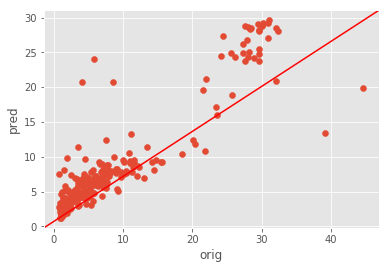

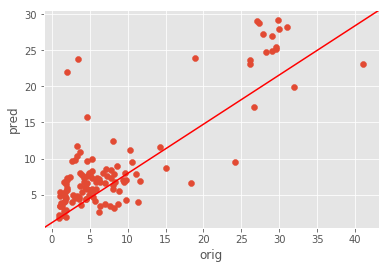

In [28]:
ml_cols_nolab_w_dr = ['SOL_CLAY1', 'SOL_SILT1', 'SOL_SAND1', 'SOL_ROCK1', '_mean', '_median', '_stdev', 'twi_mean',
       'twi_median', 'twi_stdev', 'ls_mean', 'ls_median', 'ls_stdev',
       'tri_mean', 'tri_median', 'tri_stdev', 'drain_prct', 'SOC_mean']

ml_data = data[ml_cols_nolab_w_dr]

display(ml_data.isnull().sum())
ml_data = ml_data.dropna()

# 766	2	4	auto	20.0	True
testsplit1 = 0.3 # test split 3
params1 = {'n_estimators': 766,
               'max_features': 'auto',
               'max_depth': 20.0,
               'min_samples_split': 2,
               'min_samples_leaf': 4,
               'bootstrap': True}

params1['bootstrap'] = True
params1['oob_score'] = True

# Create a model with the best parameters
# Split the data
X = ml_data.drop(columns=['SOC_mean']).values
Y = ml_data['SOC_mean'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=30)
y_train = np.ravel(Y_train)
y_test = np.ravel(Y_test)

regressor1 = RFReg()
regressor1.set_params(**params1)
regressor1.fit(X_train, y_train)

Y_train_pred = regressor1.predict(X_train)
Y_test_pred = regressor1.predict(X_test)

display(r2_score(y_test, Y_test_pred))
display(regressor1.oob_score_)
display(pearsonr(Y_train_pred, y_train)[0], pearsonr(Y_test_pred, y_test)[0])

pred_cols = list(ml_data.drop(columns=['SOC_mean']).columns)
feat_imp = list(regressor1.feature_importances_)
feat_imp_dict = dict(zip(pred_cols, feat_imp))

counter = 0
for feat in sorted(feat_imp_dict, key=feat_imp_dict.get, reverse=True):
    print(feat, feat_imp_dict[feat])
    counter = counter + 1
    if counter > 5:
        break
    
import matplotlib.lines as mlines

fig, ax = plt.subplots()
ax.scatter(y_train, Y_train_pred)
ax.set_xlabel('orig')
ax.set_ylabel('pred')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

fig, ax = plt.subplots()
ax.scatter(y_test, Y_test_pred)
ax.set_xlabel('orig')
ax.set_ylabel('pred')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

SOL_CLAY1     0
SOL_SILT1     0
SOL_SAND1     0
SOL_ROCK1     0
_mean         0
_median       0
_stdev        0
twi_mean      0
twi_median    0
twi_stdev     0
ls_mean       0
ls_median     0
ls_stdev      0
tri_mean      0
tri_median    0
tri_stdev     0
drain_prct    0
SOC_mean      0
dtype: int64

0.6943999054833169

0.5849890886054361

0.9022310586121017

0.8361640729120372

SOL_CLAY1 0.6574666039067038
tri_stdev 0.04196126926961465
SOL_SAND1 0.030736711237589816
ls_median 0.028635206841709126
drain_prct 0.02703982670067311
SOL_ROCK1 0.02429326420909967


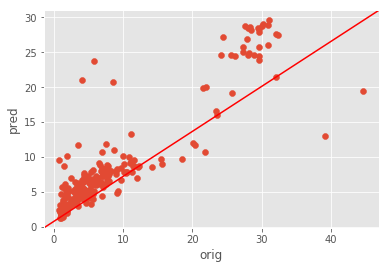

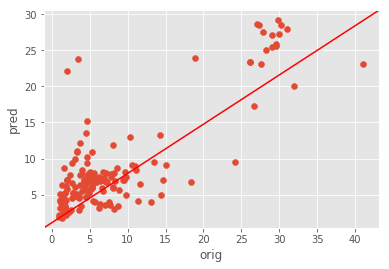

In [31]:
# 1433	2	4	auto	80.0	True
testsplit2 = 0.4 # test split 2
params2 = {'n_estimators': 1433,
               'max_features': 'auto',
               'max_depth': 80.0,
               'min_samples_split': 2,
               'min_samples_leaf': 4,
               'bootstrap': True}


params2['bootstrap'] = True
params2['oob_score'] = True

ml_data2 = data[ml_cols_nolab_w_dr]


display(ml_data2.isnull().sum())
ml_data2 = ml_data2.dropna()

X2 = ml_data2.drop(columns=['SOC_mean']).values
Y2 = ml_data2['SOC_mean'].values

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.4, random_state=30)
y_train2 = np.ravel(Y_train2)
y_test2 = np.ravel(Y_test2)

regressor2 = RFReg()
regressor2.set_params(**params2)
regressor2.fit(X_train2, y_train2)

Y_train_pred2 = regressor2.predict(X_train2)
Y_test_pred2 = regressor2.predict(X_test2)

display(r2_score(y_test2, Y_test_pred2))
display(regressor2.oob_score_)
display(pearsonr(Y_train_pred2, y_train2)[0], pearsonr(Y_test_pred2, y_test2)[0])

pred_cols = list(ml_data2.drop(columns=['SOC_mean']).columns)
feat_imp = list(regressor2.feature_importances_)
feat_imp_dict = dict(zip(pred_cols, feat_imp))

counter = 0
for feat in sorted(feat_imp_dict, key=feat_imp_dict.get, reverse=True):
    print(feat, feat_imp_dict[feat])
    counter = counter + 1
    if counter > 5:
        break
    
import matplotlib.lines as mlines

fig, ax = plt.subplots()
ax.scatter(y_train2, Y_train_pred2)
ax.set_xlabel('orig')
ax.set_ylabel('pred')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

fig, ax = plt.subplots()
ax.scatter(y_test2, Y_test_pred2)
ax.set_xlabel('orig')
ax.set_ylabel('pred')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()



In [36]:
ml_data3 = eesti_soil_red1[['SOL_CLAY1', 'SOL_SILT1', 'SOL_SAND1', 'SOL_ROCK1', '_mean', '_median', '_stdev', 'twi_mean',
       'twi_median', 'twi_stdev', 'ls_mean', 'ls_median', 'ls_stdev',
       'tri_mean', 'tri_median', 'tri_stdev', 'drain_prct']]

# ml_data3.rename(columns={'drain_pct' : 'drain_prct'}, inplace=True)



display(ml_data3.isnull().sum())
ml_data3 = ml_data3.dropna(subset=['SOL_CLAY1', 'SOL_SILT1', 'SOL_SAND1', 'SOL_ROCK1', '_mean', '_median', '_stdev', 'twi_mean',
       'twi_median', 'twi_stdev', 'ls_mean', 'ls_median', 'ls_stdev',
       'tri_mean', 'tri_median', 'tri_stdev'])
ml_data3 = ml_data3.fillna(0)
PX = ml_data3.values

display(PX.shape)
PX_test_pred = regressor1.predict(PX)

eesti_soil_red1['SOC_pred'] = PX_test_pred

display(eesti_soil_red1.sample(10))

SOL_CLAY1          0
SOL_SILT1          0
SOL_SAND1          0
SOL_ROCK1          0
_mean              0
_median            0
_stdev             0
twi_mean           0
twi_median         0
twi_stdev          0
ls_mean            0
ls_median          0
ls_stdev           0
tri_mean           0
tri_median         0
tri_stdev          0
drain_prct    476583
dtype: int64

(745442, 17)

,orig_fid,upd_siffer,WRB_code,Boniteet,Varv,Loimis1,loimis_rec,nlayers,SOL_ZMX,SOL_Z1,SOL_Z2,SOL_Z3,SOL_Z4,EST_TXT1,LXTYPE1,EST_TXT2,LXTYPE2,EST_TXT3,LXTYPE3,EST_TXT4,LXTYPE4,SOL_CLAY1,SOL_SILT1,SOL_SAND1,SOL_ROCK1,...,SOL_SILT3,SOL_SAND3,SOL_ROCK3,SOL_CLAY4,SOL_SILT4,SOL_SAND4,SOL_ROCK4,orig_fid2,_mean,_median,_stdev,twi_mean,twi_median,twi_stdev,ls_mean,ls_median,ls_stdev,tri_mean,tri_median,tri_stdev,area,area_drain,drain_prct,geometry,SOC_pred
672146,672136,M',HS-sa,53,17,t340-50/ls2,t340-50/ls2,2,1000,450,550,0,0,t3,PEAT,ls2,L,None,None,None,None,70,15,15,0,...,0,0,0,0,0,0,0,672136,1.011898,0.629080,0.849173,11.776241,10.060966,4.053933,0.162991,0.097825,0.169459,1.352889,1.292435,0.443507,42429,42429.0,100.000,"POLYGON ((602393.8200000003 6468614.77, 602386...",23.091906
207816,207539,Go1,GL-hi.eu,48,16,ls2,ls2,1,1000,1000,0,0,0,ls2,L,None,None,None,None,None,None,15,30,55,0,...,0,0,0,0,0,0,0,207539,0.396362,0.466082,0.296415,10.214293,9.377350,2.597309,0.048378,0.031401,0.040202,0.403067,0.433777,0.105624,8843,8843.0,100.000,"POLYGON ((655792.9482999966 6535023.914500002,...",5.704834
20074,20074,D,UM-ha-del.nv,50,19,sl/ls,sl/ls,1,1000,1000,0,0,0,sl,LS,ls,L,None,None,None,None,9,9,82,0,...,0,0,0,0,0,0,0,20074,2.562085,2.294430,1.581741,8.193663,7.173269,1.981660,0.490110,0.418969,0.312527,2.632757,2.704672,0.475719,8742,1662.0,19.012,"POLYGON ((661694.0399999991 6448555.879999999,...",3.647038
660613,660603,M',HS-sa,53,17,t350/ls2;r2ls2,t350/ls2,2,1000,500,500,0,0,t3,PEAT,ls2,L,None,None,None,None,70,15,15,0,...,0,0,0,0,0,0,0,660603,0.248447,0.205037,0.185102,11.053180,9.775094,3.196455,0.036296,0.016780,0.068843,0.267462,0.244103,0.122731,140637,101215.0,71.969,"POLYGON ((599314.1700000018 6520970.600000001,...",20.634665
679852,679695,M'',HS-sa,35,17,t250/pl,t250/pl,2,1000,500,500,0,0,t2,PEAT,pl,S,None,None,None,None,60,20,20,0,...,0,0,0,0,0,0,0,679695,0.061543,0.049010,0.016338,9.391985,9.472623,0.121903,0.003029,0.002142,0.001162,0.048923,0.049062,0.003401,340,NaN,NaN,"POLYGON ((688543.9571999982 6478602.476799998,...",24.679000
228033,228033,K,RG-ca,48,2,r2ls1,r2ls1,1,1000,1000,0,0,0,ls1,SL,None,None,None,None,None,None,15,20,65,15,...,0,0,0,0,0,0,0,228033,0.472498,0.414255,0.137314,8.629852,8.766308,0.974767,0.048365,0.050032,0.022070,0.397846,0.409682,0.067152,8333,1902.0,22.825,"POLYGON ((500157.5 6495226.43, 500152.90680000...",4.653891
144131,144000,GI1,GL-hi.eup,45,16,ls250-90/ls3,ls250-90/ls3,2,1000,700,300,0,0,ls2,L,ls3,CL,None,None,None,None,15,30,55,0,...,0,0,0,0,0,0,0,144000,0.303675,0.253001,0.205582,11.067861,10.172545,2.910533,0.035485,0.023720,0.033250,0.309825,0.293623,0.125841,287966,284799.0,98.900,"POLYGON ((659125.5900000036 6558170.539999999,...",6.537123
589684,589673,LP,UM-rt.lv,52,6,ls1,ls1,1,1000,1000,0,0,0,ls1,SL,None,None,None,None,None,None,15,20,65,0,...,0,0,0,0,0,0,0,589673,2.090385,2.229120,0.561414,5.811571,5.797448,0.395377,0.313952,0.327203,0.207138,2.756963,2.390406,0.801461,3317,NaN,NaN,"POLYGON ((707541.2199999988 6404637.079999998,...",5.539343
34114,34109,Dg,UM-gln-del.nv,35,19,l,l,1,1000,1000,0,0,0,l,S,None,None,None,None,None,None,5,5,90,0,...,0,0,0,0,0,0,0,34109,2.877627,2.858203,0.171081,7.727454,7.805297,0.614157,0.469118,0.470764,0.012026,2.282856,2.293789,0.066195,4755,NaN,NaN,"POLYGON ((669920.9399999976 6446029.77, 669897...",7.696744
408808,407882,L(k)IIg,PZ-cb.ab.gln,0,8,l,l,1,1000,1000,0,0,0,l,S,None,None,None,None,None,None,5,5,90,0,...,0,0,0,0,0,0,0,407882,1.028677,1.004676,0.292853,8.262793,8.584366,1.283877,0.144309,0.121552,0.077232,0.829706,0.857614,0.073556,10563,NaN,NaN,"POLYGON ((672125.8999999985 6442266.129999999,...",7.432422


In [60]:
eesti_soil_red1.dtypes


orig_fid        int64
upd_siffer     object
WRB_code       object
Boniteet        int64
Varv            int64
Loimis1        object
loimis_rec     object
nlayers         int64
SOL_ZMX         int64
SOL_Z1          int64
SOL_Z2          int64
SOL_Z3          int64
SOL_Z4          int64
EST_TXT1       object
LXTYPE1        object
EST_TXT2       object
LXTYPE2        object
EST_TXT3       object
LXTYPE3        object
EST_TXT4       object
LXTYPE4        object
SOL_CLAY1       int64
SOL_SILT1       int64
SOL_SAND1       int64
SOL_ROCK1       int64
SOL_CLAY2       int64
SOL_SILT2       int64
SOL_SAND2       int64
SOL_ROCK2       int64
SOL_CLAY3       int64
SOL_SILT3       int64
SOL_SAND3       int64
SOL_ROCK3       int64
SOL_CLAY4       int64
SOL_SILT4       int64
SOL_SAND4       int64
SOL_ROCK4       int64
SOL_SOC1      float64
SOL_SOC2      float64
SOL_SOC3      float64
SOL_SOC4      float64
SOL_BD1       float64
SOL_BD2       float64
SOL_BD3       float64
SOL_BD4       float64
slp_mean  

In [43]:
eesti_soil_red1.rename(columns={'_mean' : 'slp_mean', '_median' : 'slp_median', '_stdev' : 'slp_stdev'}, inplace=True)

In [38]:
eesti_soil_red1.drop(columns=['area', 'orig_fid2' ], inplace=True)

In [39]:
# eesti_soil_red1.to_file('eesti_soil_red1_texture_fix_geo_drain_soc.shp', encoding='utf-8')

C:\dev\conda3\envs\geopython-environment\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [48]:
def bd_formula(soc):
    SOM = soc * 1.724
    bd = 1 / ( 0.03476 * SOM + 0.6098 )
    return bd


# eesti_soil_red1.rename(columns={'SOC_pred' : 'SOL_SOC1'}, inplace=True)
# eesti_soil_red1.rename(columns={'drain_prct' : 'drain_pct'}, inplace=True)

#ml_data3 = eesti_soil_red1[['SOL_CLAY2', 'SOL_SILT2', 'SOL_SAND2', 'SOL_ROCK2', 'slp_mean', 'slp_median', 'slp_stdev', 'twi_mean',
#       'twi_median', 'twi_stdev', 'ls_mean', 'ls_median', 'ls_stdev',
#       'tri_mean', 'tri_median', 'tri_stdev', 'drain_pct']]

#ml_data3 = eesti_soil_red1[['SOL_CLAY3', 'SOL_SILT3', 'SOL_SAND3', 'SOL_ROCK3', 'slp_mean', 'slp_median', 'slp_stdev', 'twi_mean',
#       'twi_median', 'twi_stdev', 'ls_mean', 'ls_median', 'ls_stdev',
#       'tri_mean', 'tri_median', 'tri_stdev', 'drain_pct']]

ml_data3 = eesti_soil_red1[['SOL_CLAY4', 'SOL_SILT4', 'SOL_SAND4', 'SOL_ROCK4', 'slp_mean', 'slp_median', 'slp_stdev', 'twi_mean',
       'twi_median', 'twi_stdev', 'ls_mean', 'ls_median', 'ls_stdev',
       'tri_mean', 'tri_median', 'tri_stdev', 'drain_pct']]

#ml_data3 = ml_data3.dropna(subset=['SOL_CLAY2', 'SOL_SILT2', 'SOL_SAND2', 'SOL_ROCK2', 'slp_mean', 'slp_median', 'slp_stdev', 'twi_mean',
#       'twi_median', 'twi_stdev', 'ls_mean', 'ls_median', 'ls_stdev',
#       'tri_mean', 'tri_median', 'tri_stdev'])

#ml_data3 = ml_data3.dropna(subset=['SOL_CLAY3', 'SOL_SILT3', 'SOL_SAND3', 'SOL_ROCK3', 'slp_mean', 'slp_median', 'slp_stdev', 'twi_mean',
#       'twi_median', 'twi_stdev', 'ls_mean', 'ls_median', 'ls_stdev',
#       'tri_mean', 'tri_median', 'tri_stdev'])

ml_data3 = ml_data3.dropna(subset=['SOL_CLAY4', 'SOL_SILT4', 'SOL_SAND4', 'SOL_ROCK4', 'slp_mean', 'slp_median', 'slp_stdev', 'twi_mean',
       'twi_median', 'twi_stdev', 'ls_mean', 'ls_median', 'ls_stdev',
       'tri_mean', 'tri_median', 'tri_stdev'])

ml_data3 = ml_data3.fillna(0)
PX = ml_data3.values

display(PX.shape)
PX_test_pred = regressor1.predict(PX)

#eesti_soil_red1['SOL_SOC2'] = PX_test_pred
#eesti_soil_red1['SOL_SOC3'] = PX_test_pred
eesti_soil_red1['SOL_SOC4'] = PX_test_pred

display(eesti_soil_red1.sample(10))


(745442, 17)

,orig_fid,upd_siffer,WRB_code,Boniteet,Varv,Loimis1,loimis_rec,nlayers,SOL_ZMX,SOL_Z1,SOL_Z2,SOL_Z3,SOL_Z4,EST_TXT1,LXTYPE1,EST_TXT2,LXTYPE2,EST_TXT3,LXTYPE3,EST_TXT4,LXTYPE4,SOL_CLAY1,SOL_SILT1,SOL_SAND1,SOL_ROCK1,...,SOL_SAND3,SOL_ROCK3,SOL_CLAY4,SOL_SILT4,SOL_SAND4,SOL_ROCK4,slp_mean,slp_median,slp_stdev,twi_mean,twi_median,twi_stdev,ls_mean,ls_median,ls_stdev,tri_mean,tri_median,tri_stdev,area_drain,drain_pct,geometry,SOL_SOC1,SOL_SOC2,SOL_SOC3,SOL_SOC4
17088,17076,ArG,FL-gl.wso,0,15,v3l25/v1tls,v3l25/v1tls,2,1000,250,750,0,0,l,S,t,PEAT,None,None,None,None,5,5,90,25,...,0,0,0,0,0,0,0.223935,0.226446,0.101162,9.434209,9.503038,0.853187,14.396477,15.687735,5.574070,2.209401e+23,2.132832e+23,1.713808e+23,NaN,NaN,"POLYGON ((378835.7599999979 6469265.640000001,...",9.799692,28.048428,9.693027,9.693027
664827,664817,M',HS-sa,46,17,t3/l,t3/l,1,1000,1000,0,0,0,t3,PEAT,l,S,None,None,None,None,70,15,15,0,...,0,0,0,0,0,0,5.992408,4.914758,3.212869,10.777493,8.327054,4.468330,0.158105,0.119693,0.167815,5.872633e+00,4.943522e+00,2.884943e+00,NaN,NaN,"POLYGON ((713866.0900000036 6572132.399999999,...",26.955198,6.853040,8.242932,8.242932
243204,243192,Ke,RG-ca,36,2,v1sl,v1sl,1,1000,1000,0,0,0,sl,LS,None,None,None,None,None,None,9,9,82,6,...,0,0,0,0,0,0,1.779541,1.804331,0.349365,7.624180,7.499238,1.152342,0.236611,0.244786,0.125059,1.374179e+00,1.367905e+00,1.390744e-01,NaN,NaN,"POLYGON ((649649.5300000012 6422970.789999999,...",8.580613,10.660676,10.660676,10.660676
339349,339348,Ko,CM-can,0,4,sl;ls,sl,1,1000,1000,0,0,0,sl,LS,None,None,None,None,None,None,9,9,82,0,...,0,0,0,0,0,0,3.168537,3.222234,0.972638,5.735695,5.484773,0.544227,0.464081,0.470204,0.189794,2.572036e+00,2.466785e+00,5.897168e-01,NaN,NaN,"POLYGON ((657237.5300000012 6442289.760000002,...",5.224212,7.447921,7.447921,7.447921
413034,399413,L(k)I,PZ-et,0,5,l200,l200,1,2000,2000,0,0,0,l,S,None,None,None,None,None,None,5,5,90,0,...,0,0,0,0,0,0,3.083597,3.163270,1.168224,6.843869,5.702224,2.591689,0.655581,0.596515,0.422955,2.515784e+00,2.167387e+00,8.436383e-01,NaN,NaN,"POLYGON ((693144.9362000003 6383834.655000001,...",4.754626,6.860440,6.860440,6.860440
676689,676679,M',HS-sa,53,17,t330-90/kl1ls120/r3ls1,t330-90/kl1ls120/r3ls1,3,1000,600,200,200,0,t3,PEAT,None,None,ls1,SL,None,None,70,15,15,0,...,65,25,0,0,0,0,0.492701,0.344486,0.408256,12.294378,11.325086,4.097867,0.032095,0.001047,0.056749,4.999701e-01,4.734725e-01,2.738986e-01,119829.0,74.792,"POLYGON ((529137.0399999991 6552733.949999999,...",21.870754,12.546223,7.316741,12.754394
644230,644084,LPg,UM-gln.stp.rt.lv,48,7,tls,tls,1,1000,1000,0,0,0,t,PEAT,None,None,None,None,None,None,50,25,25,0,...,0,0,0,0,0,0,0.519804,0.315112,0.427523,8.942029,8.134863,2.459065,0.055773,0.026337,0.053310,5.195018e-01,5.040835e-01,2.291709e-01,24012.0,100.000,"POLYGON ((668183.1898000017 6561142.599800002,...",24.835400,13.475440,13.475440,13.475440
508712,463139,LkG,GL-dy,28,9,l,l,1,1000,1000,0,0,0,l,S,None,None,None,None,None,None,5,5,90,0,...,0,0,0,0,0,0,0.290596,0.254094,0.211406,11.707025,11.760270,3.505215,0.026040,0.008703,0.042065,3.764911e-01,3.421524e-01,1.677677e-01,NaN,NaN,"POLYGON ((593055.2800000012 6593057.5, 593057....",13.028432,11.158890,11.158890,11.158890
634076,633930,LPg,UM-gln.stp.rt.lv,38,7,sl60/ls1,sl60/ls1,2,1000,600,400,0,0,sl,LS,ls1,SL,None,None,None,None,9,9,82,0,...,0,0,0,0,0,0,1.071005,0.956401,0.720852,8.852136,7.792336,2.118394,0.124453,0.080691,0.129941,9.642873e-01,8.523629e-01,5.049983e-01,NaN,NaN,"POLYGON ((692380.6099999994 6430629.539999999,...",3.251914,3.302238,6.717319,6.717319
195575,195298,Go1,GL-hi.eu,0,16,l90/r1ls1,l90/r1ls1,2,1000,900,100,0,0,l,S,ls1,SL,None,None,None,None,5,5,90,0,...,0,0,0,0,0,0,0.526675,0.504505,0.227881,11.723000,12.157829,2.874540,0.071560,0.072147,0.039317,4.762909e-01,4.770886e-01,7.317874e-02,38626.0,100.000,"POLYGON ((578344.2199999988 6544295.170000002,...",7.872352,4.502398,8.368719,8.368719


In [55]:
# reset SOL_SOC2,3,4 where either sum not 100 or nlayers
eesti_soil_red1.loc[eesti_soil_red1['nlayers'] < 2,['SOL_SOC2']] = 0

eesti_soil_red1.loc[eesti_soil_red1['nlayers'] < 2,['SOL_SOC3']] = 0
eesti_soil_red1.loc[eesti_soil_red1['nlayers'] < 2,['SOL_SOC4']] = 0

eesti_soil_red1.loc[eesti_soil_red1['nlayers'] < 3,['SOL_SOC3']] = 0
eesti_soil_red1.loc[eesti_soil_red1['nlayers'] < 3,['SOL_SOC4']] = 0

eesti_soil_red1.loc[eesti_soil_red1['nlayers'] < 4,['SOL_SOC4']] = 0

eesti_soil_red1['SOL_BD1'] = 0
eesti_soil_red1['SOL_BD2'] = 0
eesti_soil_red1['SOL_BD3'] = 0
eesti_soil_red1['SOL_BD4'] = 0

eesti_soil_red1.loc[eesti_soil_red1['nlayers'] >= 1,['SOL_BD1']] = eesti_soil_red1['SOL_SOC1'].apply(bd_formula)
eesti_soil_red1.loc[eesti_soil_red1['nlayers'] >= 2,['SOL_BD2']] = eesti_soil_red1['SOL_SOC2'].apply(bd_formula)
eesti_soil_red1.loc[eesti_soil_red1['nlayers'] >= 3,['SOL_BD3']] = eesti_soil_red1['SOL_SOC3'].apply(bd_formula)
eesti_soil_red1.loc[eesti_soil_red1['nlayers'] >= 4,['SOL_BD4']] = eesti_soil_red1['SOL_SOC4'].apply(bd_formula)

In [56]:
display(eesti_soil_red1.sample(5))

,orig_fid,upd_siffer,WRB_code,Boniteet,Varv,Loimis1,loimis_rec,nlayers,SOL_ZMX,SOL_Z1,SOL_Z2,SOL_Z3,SOL_Z4,EST_TXT1,LXTYPE1,EST_TXT2,LXTYPE2,EST_TXT3,LXTYPE3,EST_TXT4,LXTYPE4,SOL_CLAY1,SOL_SILT1,SOL_SAND1,SOL_ROCK1,...,SOL_SAND4,SOL_ROCK4,slp_mean,slp_median,slp_stdev,twi_mean,twi_median,twi_stdev,ls_mean,ls_median,ls_stdev,tri_mean,tri_median,tri_stdev,area_drain,drain_pct,geometry,SOL_SOC1,SOL_SOC2,SOL_SOC3,SOL_SOC4,SOL_BD1,SOL_BD2,SOL_BD3,SOL_BD4
537318,529587,LkIg,RT-gln.ab.dy,30,8,pl200,pl200,1,2000,2000,0,0,0,pl,S,None,None,None,None,None,None,7,3,90,0,...,0,0,0.866249,0.798962,0.126833,7.404290,7.119969,1.090602,0.093123,0.092029,0.035499,0.630220,0.595629,0.113060,6117.0,100.000,"POLYGON ((696437.9600000009 6466664.670000002,...",9.026120,0.000000,0.0,0.0,0.869035,0.000000,0.0,0.0
563839,563828,LP,UM-rt.lv,47,6,kM1sl40/k51ls1,kM1sl40/k51ls1,2,1000,400,600,0,0,sl,LS,ls1,SL,None,None,None,None,9,9,82,6,...,0,0,2.242604,1.383249,1.949199,7.219226,7.238506,0.891371,0.358676,0.120805,0.486222,2.285447,2.304350,1.188287,NaN,NaN,"POLYGON ((686606.0900000036 6429920.66, 686607...",4.884216,5.041536,0.0,0.0,1.108042,1.096587,0.0,0.0
687839,687682,M'',HS-sa,51,17,t360/ls2;l,t360/ls2,2,1000,600,400,0,0,t3,PEAT,ls2,L,None,None,None,None,70,15,15,0,...,0,0,0.648403,0.645475,0.254049,12.097741,12.030895,2.888144,0.131062,0.117353,0.069050,0.710588,0.686921,0.151772,NaN,NaN,"POLYGON ((605679.2950000018 6457861.305, 60567...",25.263963,5.681366,0.0,0.0,0.470860,1.052340,0.0,0.0
337731,337730,Ko,CM-can,63,4,vM1ls155/r1ls1,vM1ls155/r1ls1,2,1000,550,450,0,0,ls1,SL,ls1,SL,None,None,None,None,15,20,65,6,...,0,0,0.774066,0.754094,0.374751,7.666460,7.724036,0.538536,0.074769,0.060593,0.051913,0.704654,0.742854,0.166421,1770.0,7.659,"POLYGON ((599643.7700000033 6518832.010000002,...",2.925404,2.925404,0.0,0.0,1.273709,1.273709,0.0,0.0
45883,45878,Dg,UM-gln-del.nv,43,19,sl,sl,1,1000,1000,0,0,0,sl,LS,None,None,None,None,None,None,9,9,82,0,...,0,0,3.234330,3.908073,1.510000,9.391410,9.975230,2.499947,0.500131,0.420637,0.437123,3.417303,3.499066,0.842245,NaN,NaN,"POLYGON ((630713.7400000021 6539191.899999999,...",5.429599,0.000000,0.0,0.0,1.069318,0.000000,0.0,0.0


In [59]:
eesti_soil_red1 = eesti_soil_red1[['orig_fid', 'upd_siffer', 'WRB_code', 'Boniteet', 'Varv', 'Loimis1',
       'loimis_rec', 'nlayers', 'SOL_ZMX', 'SOL_Z1', 'SOL_Z2', 'SOL_Z3',
       'SOL_Z4', 'EST_TXT1', 'LXTYPE1', 'EST_TXT2', 'LXTYPE2', 'EST_TXT3',
       'LXTYPE3', 'EST_TXT4', 'LXTYPE4', 'SOL_CLAY1', 'SOL_SILT1', 'SOL_SAND1',
       'SOL_ROCK1', 'SOL_CLAY2', 'SOL_SILT2', 'SOL_SAND2', 'SOL_ROCK2',
       'SOL_CLAY3', 'SOL_SILT3', 'SOL_SAND3', 'SOL_ROCK3', 'SOL_CLAY4',
       'SOL_SILT4', 'SOL_SAND4', 'SOL_ROCK4', 'SOL_SOC1', 'SOL_SOC2',
       'SOL_SOC3', 'SOL_SOC4', 'SOL_BD1', 'SOL_BD2', 'SOL_BD3', 'SOL_BD4',
                                   'slp_mean', 'slp_median',
       'slp_stdev', 'twi_mean', 'twi_median', 'twi_stdev', 'ls_mean',
       'ls_median', 'ls_stdev', 'tri_mean', 'tri_median', 'tri_stdev',
       'area_drain', 'drain_pct', 'geometry']]


In [61]:
eesti_soil_red1.to_file('eesti_soil_red1_texture_fix_geo_drain_soc_bd.shp', encoding='utf-8')

C:\dev\conda3\envs\geopython-environment\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
